<a href="https://colab.research.google.com/github/Rohit-Saswadkar/Netflix_TV_shows_and_Movies_Clustering/blob/main/4%5D_Netflix_Movies_and_TV_shows_clustering_and_Recommener_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix Tv shows and Movies Clustering and recommender system

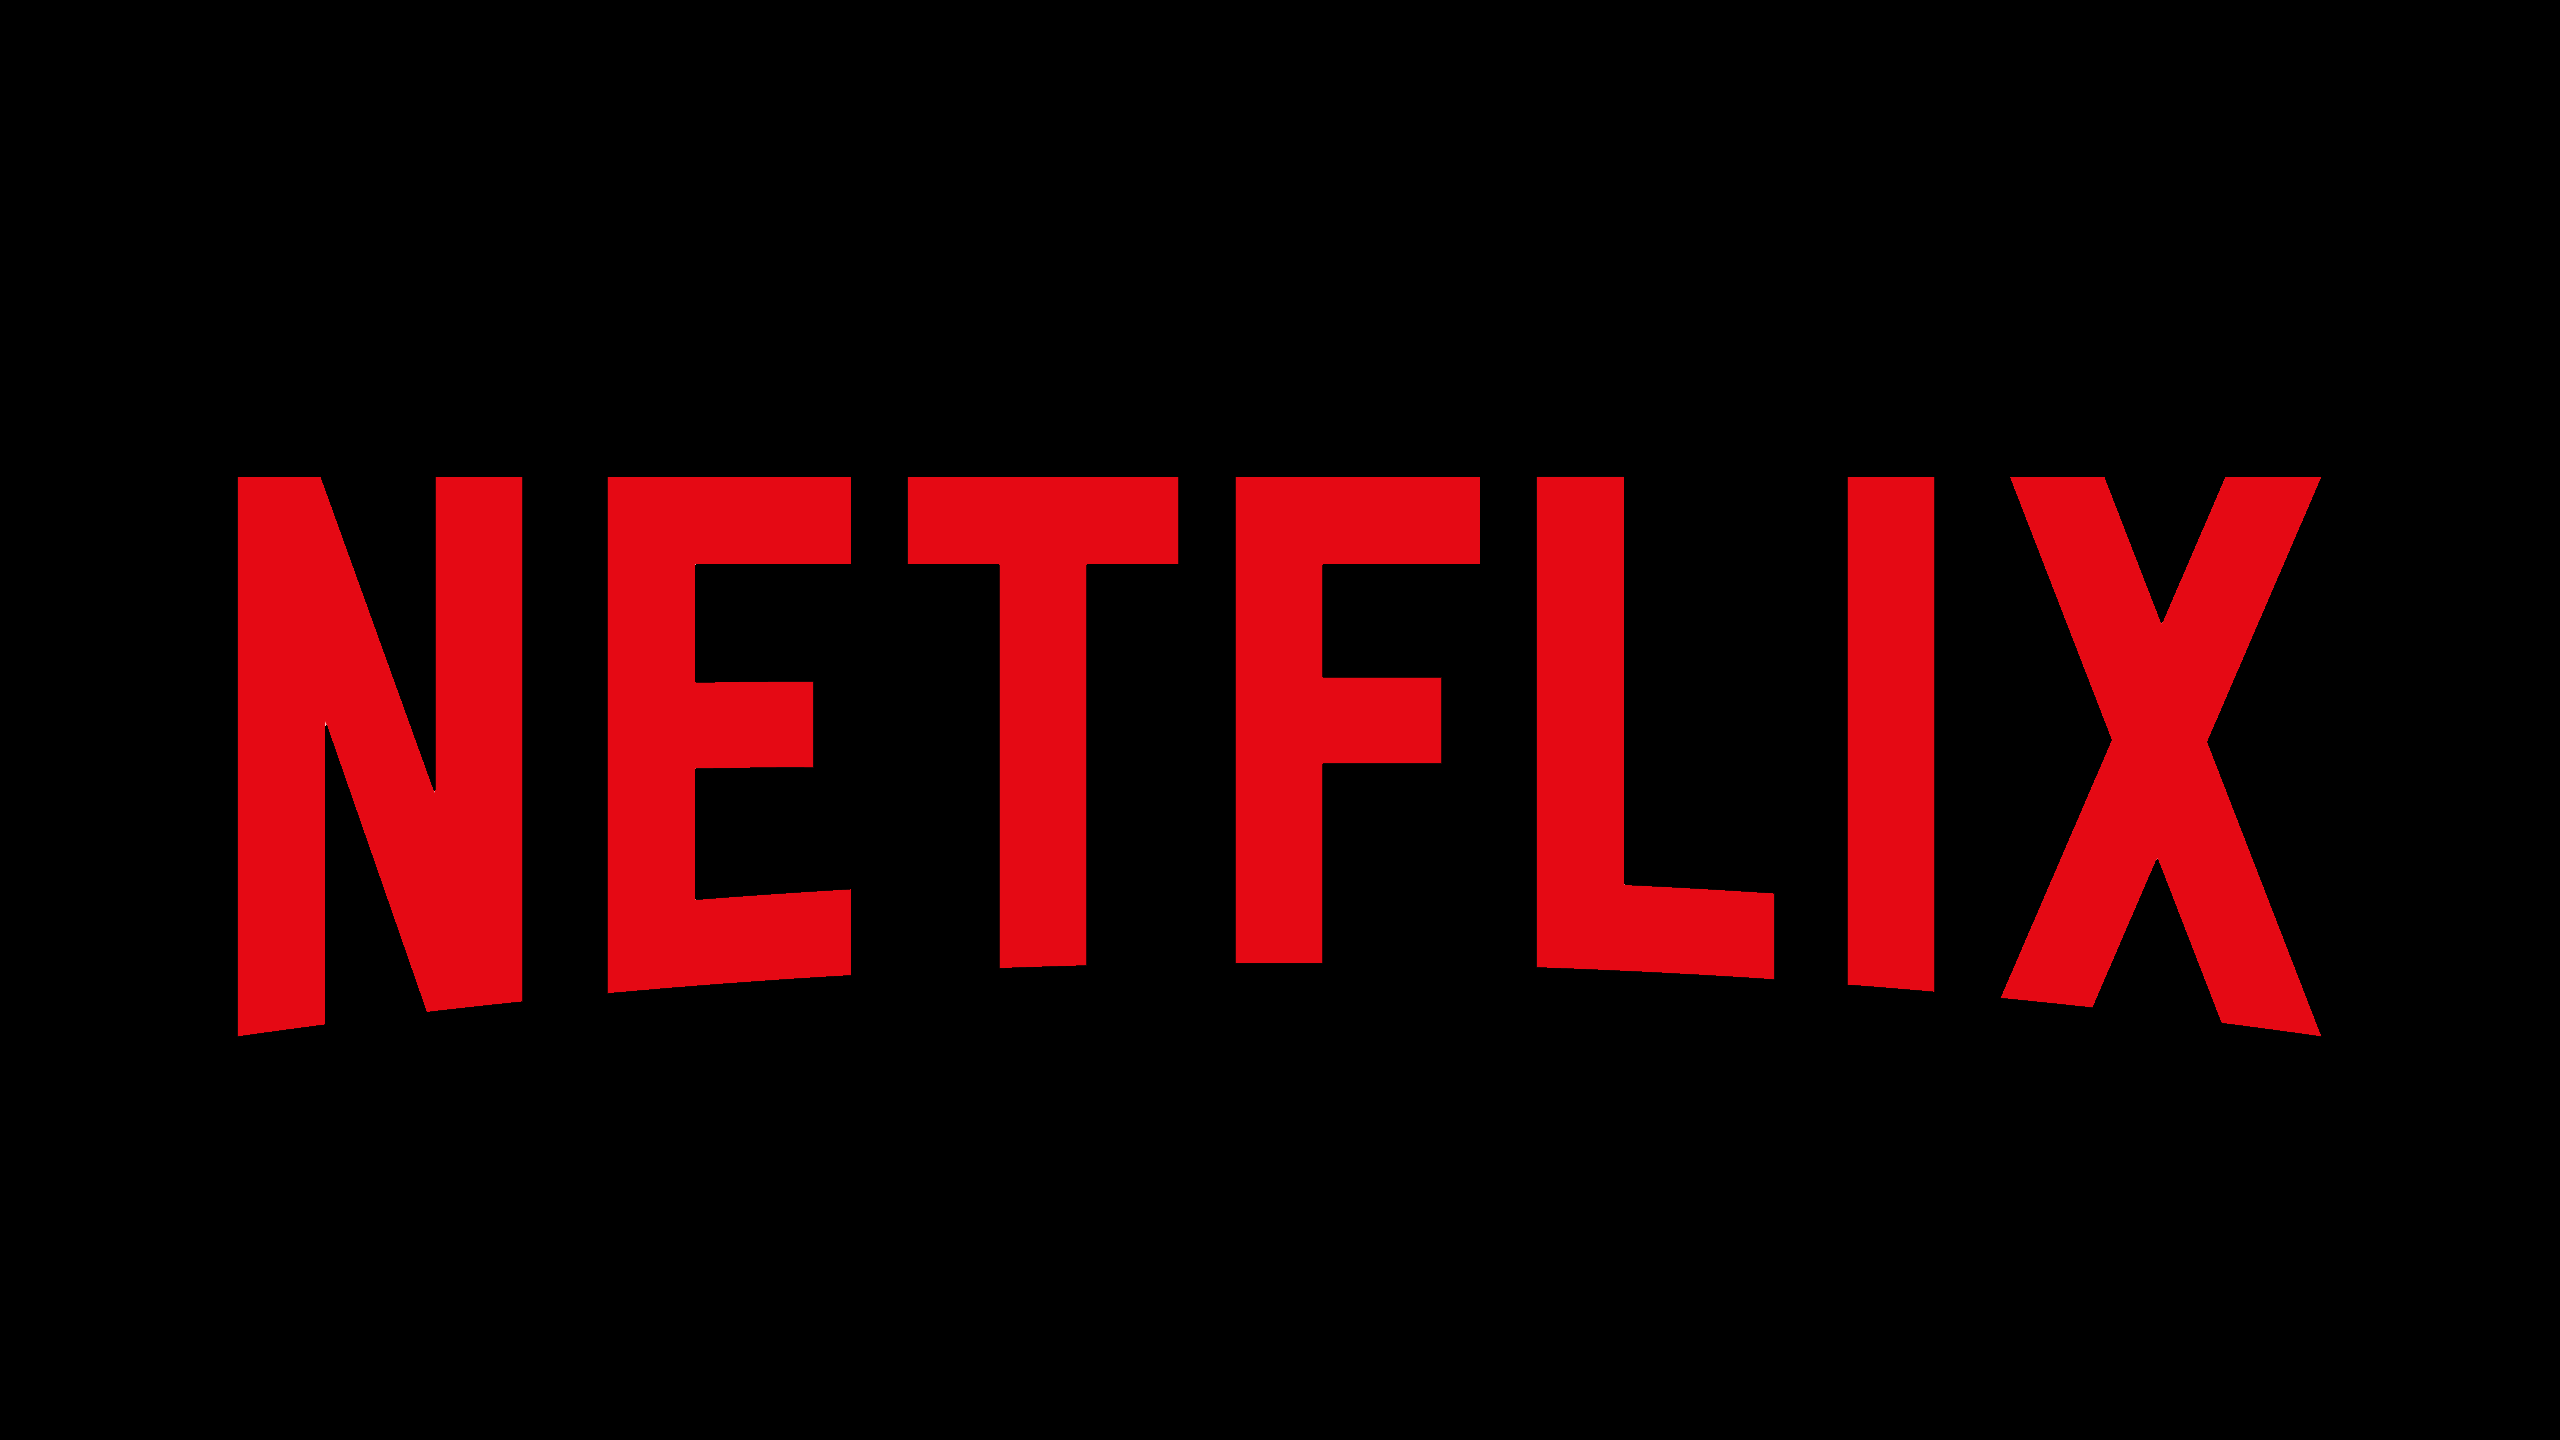

# **Project Summary -**

The aim of this project is to analyze the Netflix Dataset of movies and TV shows until 2019, sourced from the third-party search engine Flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn for Netflix, which currently has over 220 million subscribers.

 Additionally, the dataset will be analyzed to uncover insights and trends in the streaming entertainment industry.

**The project followed a step-by-step process:**

1. **Handling null values** in the dataset.
2. Managing nested columns **(director, cast, listed_in, country)** for better visualization.
3. Binning the rating attribute into categories **(adult, children's, family-friendly, not rated).**
4. Performing **Exploratory Data Analysis (EDA)** to gain insights for preventing subscriber churn.
5. Creating clusters using attributes like **director, cast, country, genre, rating, and description.** These attributes were **tokenized, preprocessed, and vectorized** using **TF-IDF vectorizer.**
6. Reducing the dimensionality of the dataset using **PCA** to improve performance.
7. Employing **K-Means Clustering and Agglomerative Hierarchical Clustering** algorithms, determining optimal cluster numbers (4 for K-Means, 2 for hierarchical clustering) through various evaluation methods.
8. Developing a **content-based recommender system** using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix. \

**This comprehensive analysis and recommendation system are expected to enhance user satisfaction, leading to improved retention rates for Netflix.**






##**The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:**



1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##***1. Know Your Data***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

In [ ]:
path = '/content/drive/MyDrive/Data Science Advanced Projects/capstones/Netflix Clustering/Data/NETFLIX MOVIES AND TV SHOWS CLUSTERING (2).csv'
df = pd.read_csv(path)

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
df_new = df.copy()

In [ ]:
df.shape

(7787, 12)

**Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

**Missing value null counts**

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
print('Percent of null values in df:\n', (df.isnull().sum() / df.shape[0]) * 100)

Percent of null values in df:
 show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


**Visualize the null values**

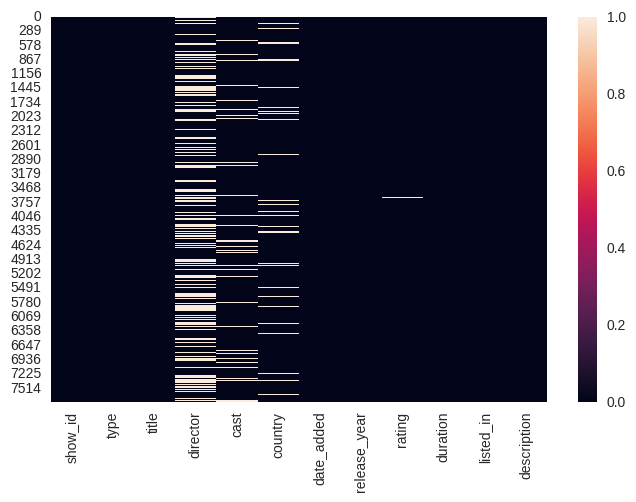

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull() )
plt.show()

**Understanding Our Dataset**

In [ ]:
df.describe(include = 'all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

**Check unique values of each feature**

In [ ]:
for col in df.columns:
  print(f'{col}:', df[col].nunique())

show_id: 7787
type: 2
title: 7787
director: 4049
cast: 6831
country: 681
date_added: 1565
release_year: 73
rating: 14
duration: 216
listed_in: 492
description: 7769


##***2. Data Wrangling***

The rating column has lots of categories so I have to sagregate them in some common categories.

In [ ]:
df['rating'].value_counts()

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

Country has nested list in it. I have to separate and stck them to better analyzation.

In [ ]:
df['country'].value_counts()

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

1. Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
2. We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
3. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [ ]:
df[['director','cast']] = df[['director','cast']].fillna('Unknown')

Filled null countries by most frequent country

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df.dropna(axis = 0 , inplace = True)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df_new = df.copy()

B. handling Nested column ie director , cast, listed_in and country

In [ ]:
dir_constraints = df['director'].apply( lambda x: x.split(',')).tolist()
df1 = pd.DataFrame( dir_constraints, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1 = df1.rename( columns = {0:'Director'})
df1.drop('level_1', axis = 1, inplace = True)
df1

title           Director
0                                          3%            Unknown
1                                        7:19  Jorge Michel Grau
2                                       23:59       Gilbert Chan
3                                           9        Shane Acker
4                                          21     Robert Luketic
...                                       ...                ...
8482                                     Zozo        Josef Fares
8483                                   Zubaan        Mozez Singh
8484                        Zulu Man in Japan            Unknown
8485                    Zumbo's Just Desserts            Unknown
8486  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Sam Dunn

[8487 rows x 2 columns]

**Unnesting cast column**

In [ ]:
cast_constraints = df['cast'].apply(lambda x: x.split(',')).tolist()
df2 = pd.DataFrame( cast_constraints , index = df['title'])
df2 = df2.stack().reset_index().rename(columns = {0:'Actors'})
df2.drop( 'level_1',axis = 1, inplace= True)
df2

title                  Actors
0                                           3%             João Miguel
1                                           3%        Bianca Comparato
2                                           3%            Michel Gomes
3                                           3%         Rodolfo Valente
4                                           3%         Vaneza Oliveira
...                                        ...                     ...
56558                                   Zubaan   Chittaranjan Tripathy
56559                        Zulu Man in Japan                 Nasty C
56560                    Zumbo's Just Desserts           Adriano Zumbo
56561                    Zumbo's Just Desserts             Rachel Khoo
56562  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS                 Unknown

[56563 rows x 2 columns]

**Unnesting listed_in column**

In [ ]:
 listed_in_constraints = df['listed_in'].apply( lambda x: x.split(',')).tolist()
 df3 = pd.DataFrame( listed_in_constraints , index = df['title']).stack().reset_index().rename(columns = {0:'Genre'}).drop('level_1', axis = 1)
 df3

title                   Genre
0                                           3%  International TV Shows
1                                           3%               TV Dramas
2                                           3%     TV Sci-Fi & Fantasy
3                                         7:19                  Dramas
4                                         7:19    International Movies
...                                        ...                     ...
17037                        Zulu Man in Japan        Music & Musicals
17038                    Zumbo's Just Desserts  International TV Shows
17039                    Zumbo's Just Desserts              Reality TV
17040  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Documentaries
17041  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS        Music & Musicals

[17042 rows x 2 columns]

**Unnesting country column**

In [ ]:
country_constraints = df['country'].apply( lambda x: x.split(',')).tolist()
df4 = pd.DataFrame( country_constraints, index = df['title']).stack().reset_index().rename( columns = {0:'Country'}).drop('level_1',axis=1)
df4

title         Country
0                                          3%          Brazil
1                                        7:19          Mexico
2                                       23:59       Singapore
3                                           9   United States
4                                          21   United States
...                                       ...             ...
9552                        Zulu Man in Japan   United States
9553                    Zumbo's Just Desserts       Australia
9554  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  United Kingdom
9555  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Canada
9556  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   United States

[9557 rows x 2 columns]

Great, I successfully separated nested columns. Now merge all dataframes

In [ ]:
df5 = pd.merge( df2, df1, how='inner', on='title')
df5 = pd.merge( df5,df3, how='inner', on='title')
df5 = pd.merge( df5, df4, on = 'title', how = 'inner')
df5

title             Actors  Director  \
0                                            3%        João Miguel   Unknown   
1                                            3%        João Miguel   Unknown   
2                                            3%        João Miguel   Unknown   
3                                            3%   Bianca Comparato   Unknown   
4                                            3%   Bianca Comparato   Unknown   
...                                         ...                ...       ...   
175858  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175859  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175860  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175861  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175862  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   

                         Genre         Country  
0       International TV Shows          Brazil  
1                    TV Dramas          Brazil  
2          TV Sci-Fi & Fantasy          Brazil  
3       International TV Shows          Brazil  
4                    TV Dramas          Brazil  
...                        ...             ...  
175858           Documentaries          Canada  
175859           Documentaries   United States  
175860        Music & Musicals  United Kingdom  
175861        Music & Musicals          Canada  
175862        Music & Musicals   United States  

[175863 rows x 5 columns]

Final Dataframe

In [ ]:
df = df5.merge( df[['type','title','date_added','release_year','rating','duration','description']], on= 'title',how = 'inner')

In [ ]:
df.head()

title             Actors Director                   Genre Country     type  \
0    3%        João Miguel  Unknown  International TV Shows  Brazil  TV Show   
1    3%        João Miguel  Unknown               TV Dramas  Brazil  TV Show   
2    3%        João Miguel  Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%   Bianca Comparato  Unknown  International TV Shows  Brazil  TV Show   
4    3%   Bianca Comparato  Unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

##***3. Type Casting***

In [ ]:
# checking info of the data before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175863 entries, 0 to 175862
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175863 non-null  object
 1   Actors        175863 non-null  object
 2   Director      175863 non-null  object
 3   Genre         175863 non-null  object
 4   Country       175863 non-null  object
 5   type          175863 non-null  object
 6   date_added    175863 non-null  object
 7   release_year  175863 non-null  int64 
 8   rating        175863 non-null  object
 9   duration      175863 non-null  object
 10  description   175863 non-null  object
dtypes: int64(1), object(10)
memory usage: 14.8+ MB


In [ ]:
df.head(2)

title       Actors Director                   Genre Country     type  \
0    3%  João Miguel  Unknown  International TV Shows  Brazil  TV Show   
1    3%  João Miguel  Unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...

In [ ]:
df['duration'].value_counts()

duration
1 Season     30974
2 Seasons     8198
3 Seasons     4690
106 min       3756
94 min        3580
             ...  
34 min           3
9 min            2
8 min            2
13 min           2
11 min           2
Name: count, Length: 216, dtype: int64

In [ ]:
df['1 Season'] = np.where(df['duration'] == '1 Season',1,0)
df['2 Season'] = np.where( df['duration'] == '2 Seasons',1,0)
df['3 Season'] = np.where( df['duration'] == '3 Seasons',1,0)

In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration'] = df['duration'].apply( lambda x : int(x.split()[0]))

In [ ]:
df['date_added']

0         August 14, 2020
1         August 14, 2020
2         August 14, 2020
3         August 14, 2020
4         August 14, 2020
               ...       
175858      March 1, 2020
175859      March 1, 2020
175860      March 1, 2020
175861      March 1, 2020
175862      March 1, 2020
Name: date_added, Length: 175863, dtype: object

In [ ]:
# Typecastingstring object to date toime of the date added column
df['date_added']= pd.to_datetime(df['date_added'], errors = 'coerce')

In [ ]:
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [ ]:
# dropping the date added
df.drop( 'date_added', axis = 1, inplace = True)

Binning of Rating attribute

in rating coolumns we have differnt categories these are content rating classification that are commonly used i United States and other countries to indicate appropriateness of media for diffenren age groupes.

* TvMA: this rating is used for mature audience only
* R: thsi rating is used for audience of 17 and above.
* PG 13: its used for age on and above 13.
* TV 14: This rating is used for TV shows and not suitable for children under 14
* TV PG: This is rating for children under 8.
* NR: This stands for Not Rated, ie its not rated by Govt.
* TV G: This is suitable for all ages.
* TV Y: Thi is rating suitable for children.
* TV Y7: This rating shows TV shows not suitable for children under 7.
* PG: This is rating which not suitable for children under 10.
* G: This rating used ofr movies and suitable for all audiences.
* NC-17: This rating not suitable for audiences under 17.
* TV Y7 FV: This rating not suitable for children under 7.
* UR: This stands for Unrated means its not rated by Govt.

* Let's not complicate it and create bins for following.
* 1. Adult content: TV MA, NC17, R
* 2. Children content: TV PG, PG, TV g, G
* 3. Teen Content: PG13, TV14
* 4. Family friendly Content: TV y, TV Y7, TV Y7 FV
* 5. Not Rated: NR, UR

In [ ]:
# bining the values in the rating colun

rating_map = {'TV-MA':'Adult Content', 'R':'Adult Content','NC-17':'Adult Content', 'PG-13':'Teen Content',
              'TV-14':'Teen Content','TV-PG':'Children Content', 'NR':'Not Rated', 'TV-G':'Children Content', 'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content', 'PG':'Children Content', 'G':'Children Content', 'TV-Y7-FV':'Family-friendly Content','UR':'Not Rated'}

In [ ]:
df['rating'].replace( rating_map, inplace= True)

In [ ]:
df['rating'].value_counts()

rating
Adult Content              86297
Teen Content               52417
Children Content           26663
Family-friendly Content     8626
Not Rated                   1860
Name: count, dtype: int64

In [ ]:
# checkinh head after bining
df.head()

title             Actors Director                   Genre Country     type  \
0    3%        João Miguel  Unknown  International TV Shows  Brazil  TV Show   
1    3%        João Miguel  Unknown               TV Dramas  Brazil  TV Show   
2    3%        João Miguel  Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%   Bianca Comparato  Unknown  International TV Shows  Brazil  TV Show   
4    3%   Bianca Comparato  Unknown               TV Dramas  Brazil  TV Show   

   release_year         rating  duration  \
0          2020  Adult Content         4   
1          2020  Adult Content         4   
2          2020  Adult Content         4   
3          2020  Adult Content         4   
4          2020  Adult Content         4   

                                         description  1 Season  2 Season  \
0  In a future where the elite inhabit an island ...         0         0   
1  In a future where the elite inhabit an island ...         0         0   
2  In a future where the elite inhabit an island ...         0         0   
3  In a future where the elite inhabit an island ...         0         0   
4  In a future where the elite inhabit an island ...         0         0   

   3 Season  day_added  month_added  year_added  
0         0       14.0          8.0      2020.0  
1         0       14.0          8.0      2020.0  
2         0       14.0          8.0      2020.0  
3         0       14.0          8.0      2020.0  
4         0       14.0          8.0      2020.0

**5. separating Movies and TV shows**

In [ ]:
df_movies = df[ df['type'] == 'Movie']
df_tv_shows = df[ df['type'] == 'TV Show']

In [ ]:
print('Movies df shape',df_movies.shape)
print('TV shows df shape', df_tv_shows.shape)

Movies df shape (126135, 16)
TV shows df shape (49728, 16)


In [ ]:
for col in [ '1 Season','2 Season','3 Season']:
  print( df[col].value_counts())

1 Season
0    144889
1     30974
Name: count, dtype: int64
2 Season
0    167665
1      8198
Name: count, dtype: int64
3 Season
0    171173
1      4690
Name: count, dtype: int64


What all manipulations have I done and insights I found?

I have devided data wrangling into 5 Different sections:
1. In this I have imputed the null values of:
* Imputed director and cast with unknown
* imputed country mode
* drop null values of date added and reting ( less percentage)]

2. I have unnested values of director , cast, listed in and country.

3. I have seen that the rating column various coded categories so I have decided to create 5 bins and distribute the values accordinggly
4. And Lastly I splitted the dataframe in movies and Tv shows wise.

##**4. Data Visualization , storytelling & Experimenting with charts : Understand the relationship between variables.**

Chart 1- The relative percentage of total number of movies and tv shows on netflix?

In [ ]:
labels = ['TV Show','Movie']
values = [df.rating.value_counts()[1], df.type.value_counts()[0]]

colors = ['##ffd700','#008000']

fig = go.Figure( data= [go.Pie( labels= labels, values= values, hole= 0.6)])

fig.update_layout(
    title_text = 'Type of Content Watched on Netflix',
    title_x = 0.5,
    height = 500,
    width = 500,
    legend = dict( x= 0.9),
    annotations = [dict( text = 'Type of Content', font_size = 20, showarrow = True)]
)

fig.update_traces( marker = dict (colors = colors))

1) Insights -

1. We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

2. we can conclude that in the given Data set only **29.4% are TV Shows and 70.6% are Movies.**

2) Story telling - Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes! the production house should more focus on quality movies because there is high competition in the market.

2. TV Shows are less in numbers hence good opportunity for business.

2]. How Content is distributed over Netflix?

In [ ]:
df_tv_shows['rating'].value_counts().index

Index(['Adult Content', 'Teen Content', 'Children Content',
       'Family-friendly Content', 'Not Rated'],
      dtype='object', name='rating')

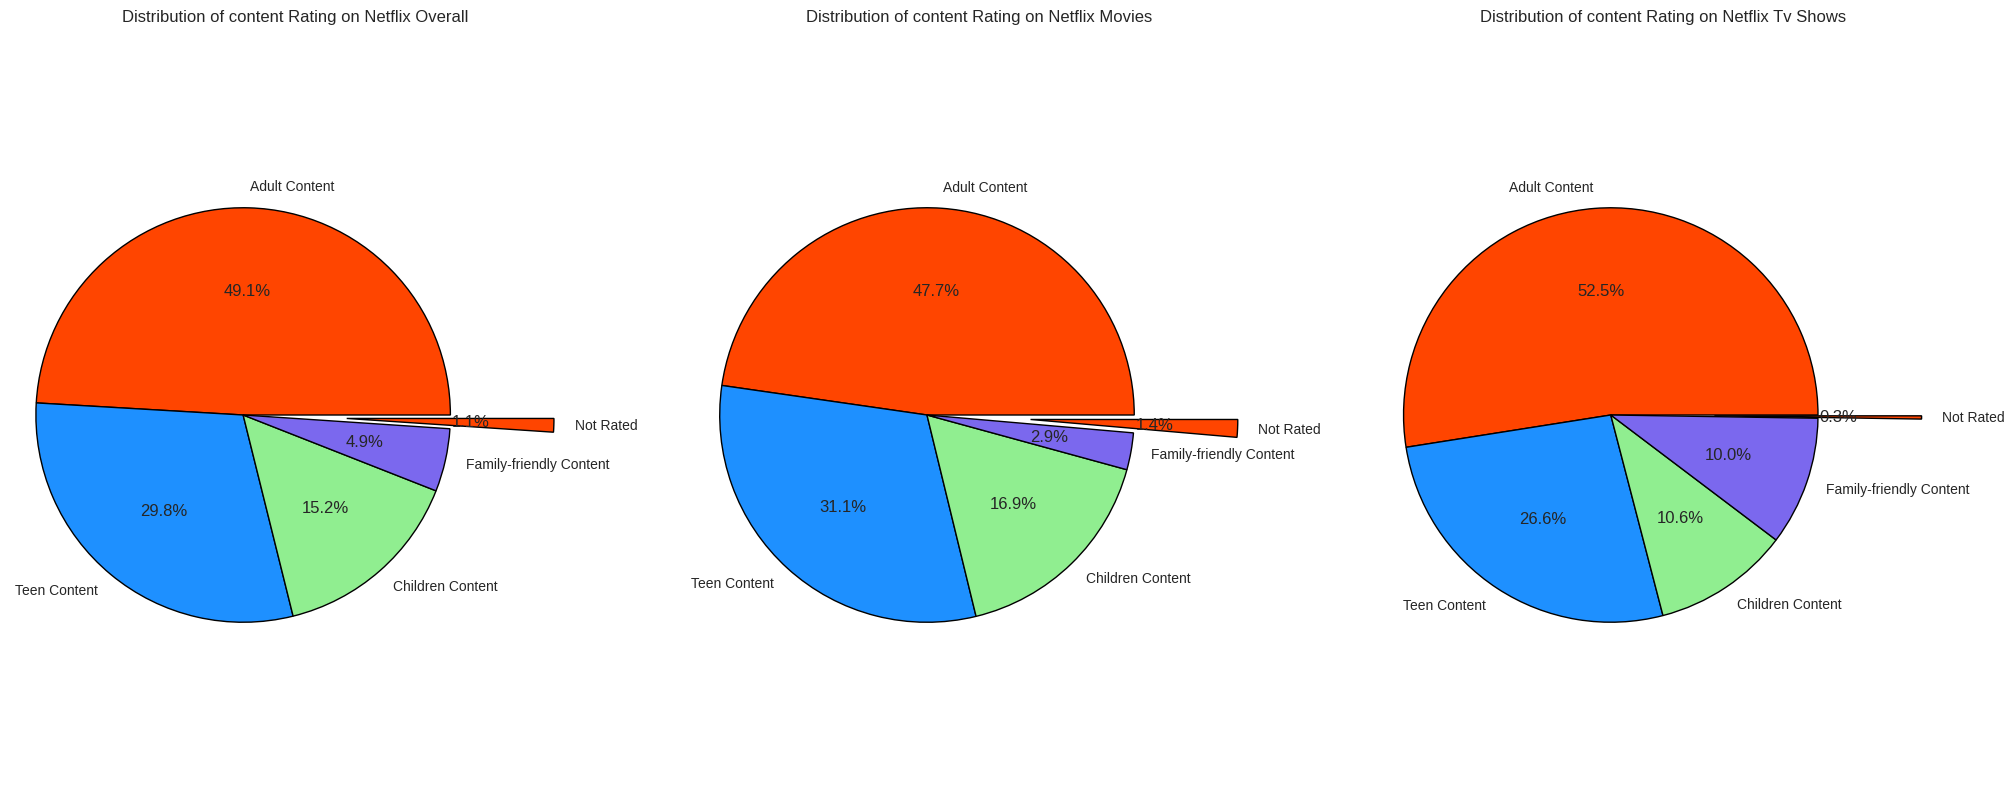

In [ ]:
plt.figure( figsize = (25,10))
for i, j, k in ((df, 'Overall',0), (df_movies, 'Movies',1), (df_tv_shows, 'Tv Shows',2)):
  plt.subplot(1,3, k+1)
  count = i['rating'].value_counts()
  plt.pie( count, labels = count.index, explode = (0,0,0,0,0.5), colors = ['orangered','dodgerblue','lightgreen','mediumslateblue'],
          autopct = '%1.1f%%', labeldistance = 1.1, wedgeprops = {'edgecolor':'black','linewidth':1,'antialiased':True})
  plt.title(f'Distribution of content Rating on Netflix {j}')
  plt.axis('equal')
plt.show()

1.We found that most of the content present in the Netflix belongs to Adult and the teen categories.

2.Another important insight we can see that **Family friendly content** less in Movies compared to TV Shows.

1) Insights -

1. We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

2. we can conclude that in the given Data set only **29.4% are TV Shows and 70.6% are Movies.**

2) How this can beneficial to us -

1.For high gains production house should more focus on Teen and Adult content.

2.There is good chances of growth in Family-friendly category in TV Shows

3]- Who are the top actors performing in Movies and TV shows?

In [ ]:
df_movies.groupby('Actors').agg({'title':'nunique'}).reset_index().sort_values( by=['title'], ascending = False)[:10]

Actors  title
24536            Unknown    426
1686         Anupam Kher     37
14796            Om Puri     27
24190     Shah Rukh Khan     27
2737         Boman Irani     25
15003       Paresh Rawal     24
21451       Akshay Kumar     22
10154     Kareena Kapoor     20
21394       Adam Sandler     19
14092   Naseeruddin Shah     18

In [ ]:
df.groupby('Actors').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)[:10]

Actors  title
35037            Unknown    718
2314         Anupam Kher     38
27200   Takahiro Sakurai     28
21165            Om Puri     27
34546     Shah Rukh Khan     27
3750         Boman Irani     25
1687       Andrea Libman     24
21449       Paresh Rawal     24
29950          Yuki Kaji     23
30547       Akshay Kumar     22

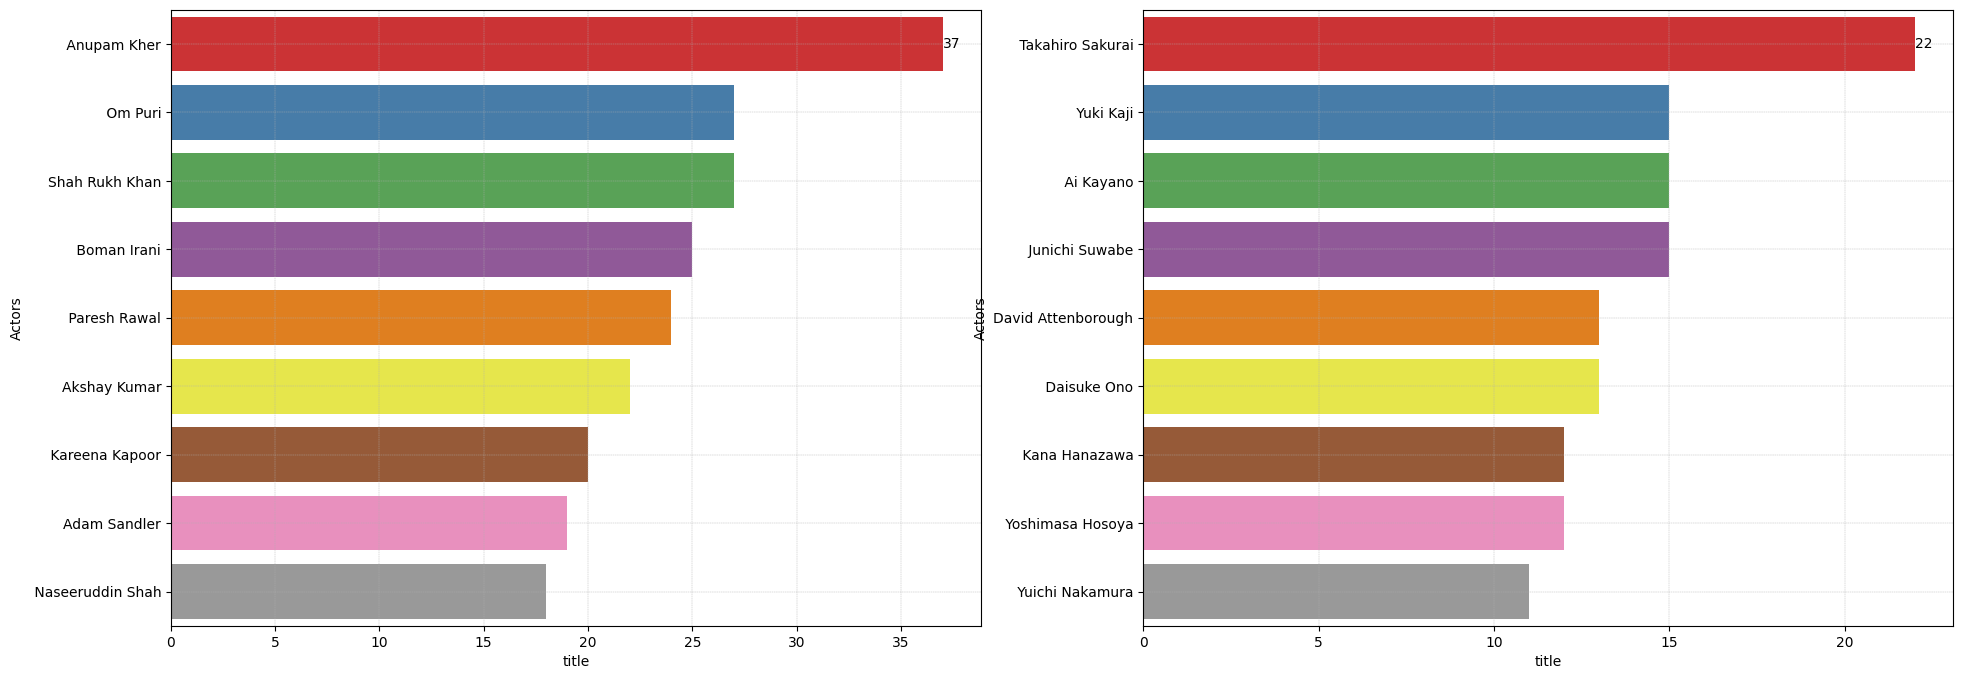

In [ ]:
# Chart 3- Who are the top actors performing in Movies and TV shows?
plt.style.use('default')
plt.figure(figsize=(23,8))
for i, j , k in ((df_movies, 'Movies',0), (df_tv_shows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby('Actors').agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[1:10]
  plots = sns.barplot( y='Actors',x = 'title', data = df_actor, palette= 'Set1')
  plt.grid(linestyle = '--', linewidth = 0.3)
  plots.bar_label(plots.containers[0])
plt.show()

1) Insights -

1. We found an interesting insight that **most of the Actors in Movies are from INDIA.**

2. No popular actors from india in TV Shows.

2) How this can beneficial to us -

Indians are movie lover, they love to watch movies hence business should target indian audience for Movies.

4) Who are the top Directors directing Movies and TV Shows?

In [ ]:
df_movies.columns

Index(['title', 'Actors', 'Director', 'Genre', 'Country', 'type',
       'release_year', 'rating', 'duration', 'description', '1 Season',
       '2 Season', '3 Season', 'day_added', 'month_added', 'year_added'],
      dtype='object')

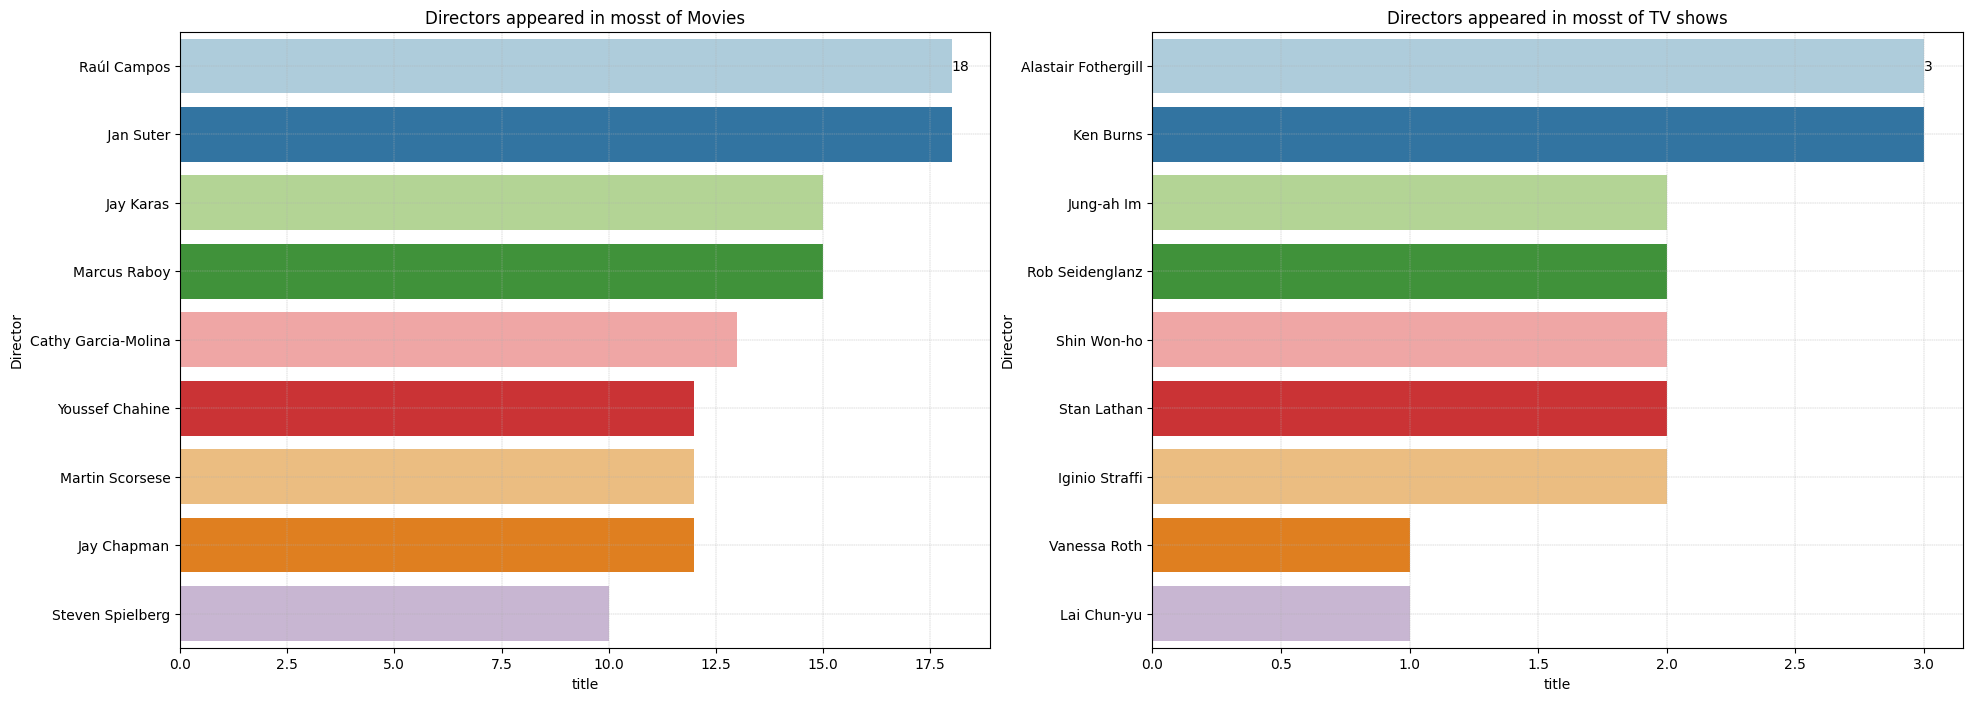

In [ ]:
# 4] Directors Spreaded in most of movies and TV shows
plt.figure(figsize = (23,8))

for i,j ,k in ((df_movies, 'Movies',0), (df_tv_shows , 'TV shows', 1)):
  plt.subplot(1 , 2 , k+1)
  df_director = i.groupby('Director').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)[1:10]
  plots = sns.barplot( y = 'Director', x = 'title', data = df_director, palette = 'Paired')
  plt.grid(linestyle = '--', linewidth = 0.3)
  plots.bar_label(plots.containers[0])
  plt.title(f'Directors appeared in mosst of {j}')
plt.show()

1) Insights -

* I found the most films are directed by Raul Campos and Jan Suter
* Most Tv shows are directed by Alastair Fothergill and Ken burns

2) How this can beneficial to us -

The insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as investing in American and Bollywood content, and acquiring more diverse content.





6) Which Countries has the highest content creation?

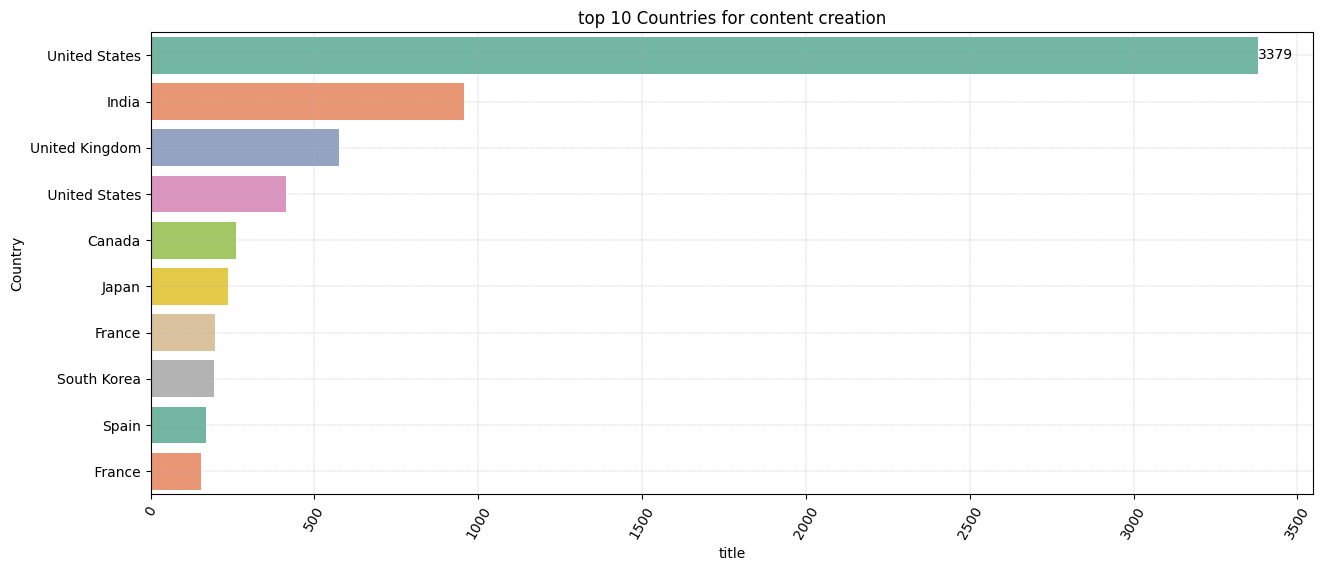

In [ ]:
df_country = df.groupby('Country').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)[:10]
plt.figure( figsize = (15,6))
plots = sns.barplot( y = 'Country', x = 'title', data = df_country, palette = 'Set2')
plt.xticks(rotation = 60)
plt.title('top 10 Countries for content creation')
plt.grid(linestyle = '--', linewidth = 0.3)
plots.bar_label( plots.containers[0])
plt.show()

1) Insights -

1. The **United States is the top country producing both movies and TV shows on Netflix**. This suggests that Netflix is heavily influenced by American content.

2. **India is the second-highest producer of movies on Netflix**, indicating the growing popularity of Bollywood movies worldwide.

3. Country like canada, france, japan also have significant presence in the data set showing diversity of content on the netflix.



7). Which countries has the highest spread of Movies and TV shos over Netflix

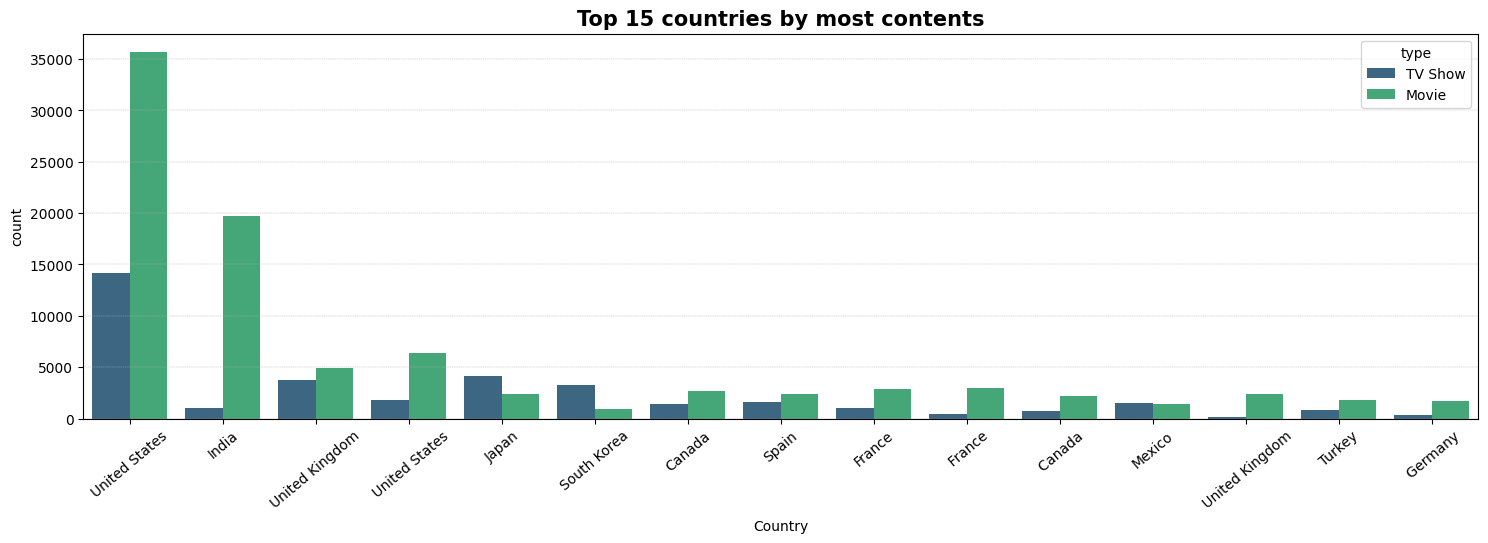

In [ ]:
# analyzing top 15 countries ith most content

plt.figure(figsize = (18,5))
plt.grid( linestyle = '--',linewidth = 0.3)
sns.countplot( x = df['Country'], order = df['Country'].value_counts().index[0:15], hue = df['type'], palette = 'viridis')
plt.xticks( rotation = 40)
plt.title('Top 15 countries by most contents', fontsize = 15, fontweight = 'bold')
plt.show()



* United states and India produces most amount of movies.
* United states and United Kingdom produces most amount of TV shows.

7) Which genre are most popular on Netflix

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

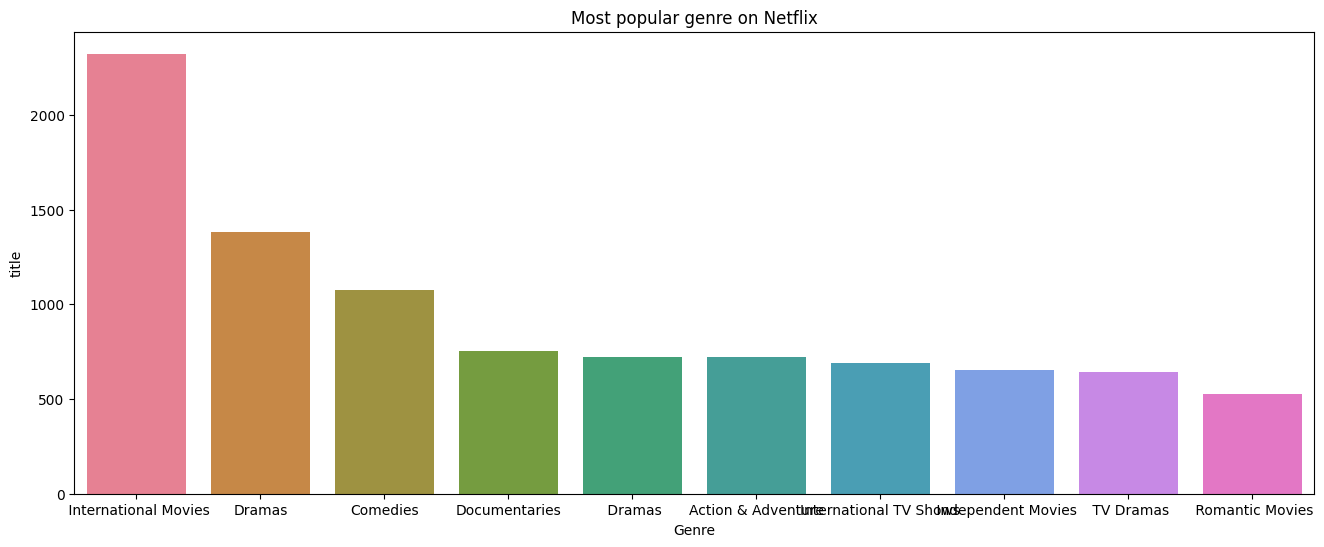

In [ ]:
datax = df.groupby('Genre').agg({'title':'nunique'}).reset_index().sort_values('title', ascending = False)[:10]
plt.figure(figsize = (16,6))
plots = sns.barplot(x = 'Genre', y='title', data = datax, palette = 'husl')
plt.title(f'Most popular genre on Netflix')
plt.xlabel

1) Insights -

1. **International movies genre is most popular** in both the TV Shows and Movies category. Followed by **Drama** and **comedy**.

2) Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can have a positive impact on Netflix's business by helping the platform understand what genres and types of content are popular with its audience. This information can help Netflix tailor its content acquisition and production strategies to better cater to the preferences of its viewers, which can lead to increased engagement and customer satisfaction.

9). Whats is the Month wise number of the content added in each year on Netflix?

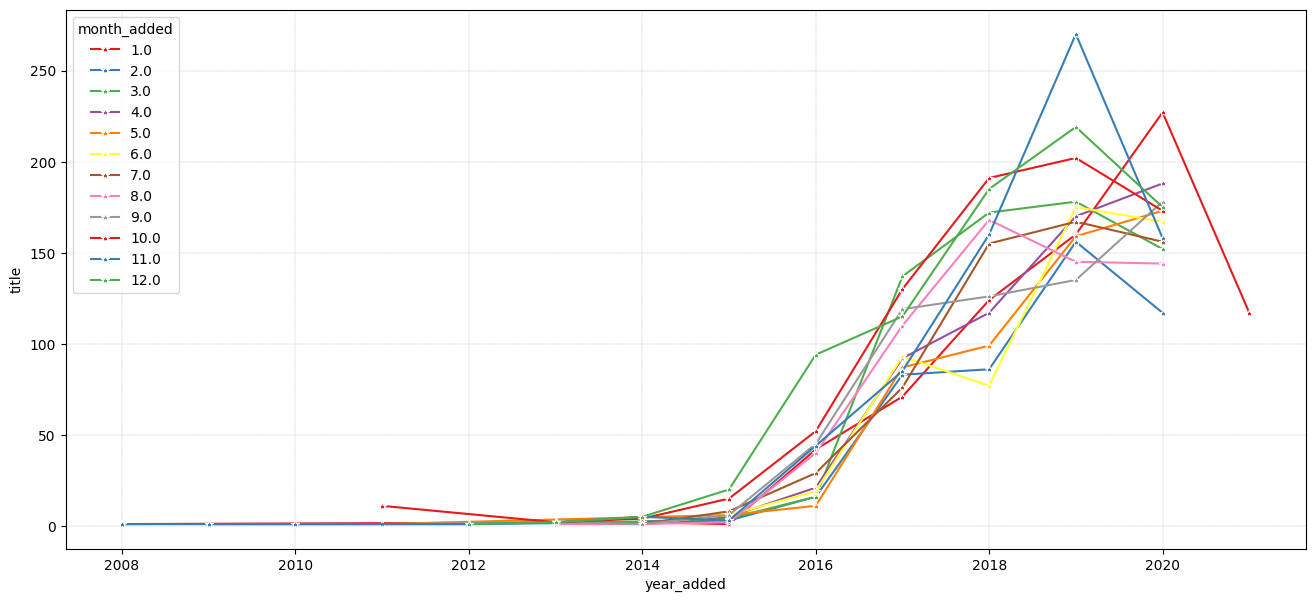

In [ ]:
plt.figure(figsize = (16,7))

df_year_month = df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values('title', ascending = True)
sns.lineplot(x = 'year_added', y='title',data = df_year_month, palette = 'Set1', hue = df_year_month['month_added'], marker = '*')
plt.grid(linestyle = '--', linewidth = 0.3)
plt.show()

1) Insights -

* In year 2008 to 2009 movies and tv shows are added in the month of February, but from 2009 to 2011 movies are added in the month of Februarryu to october
* In year 2019 to 2020 movies addition in october to december can be due to Covid 19 start.

2) Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Producers should add there movies in the month when audience is more responsive.

2. Although no specific trend is shown but most movies should be uploaded in year end with some discount in the subscription.

10). Whats the distribution of the duration of contents over Nwtflix?

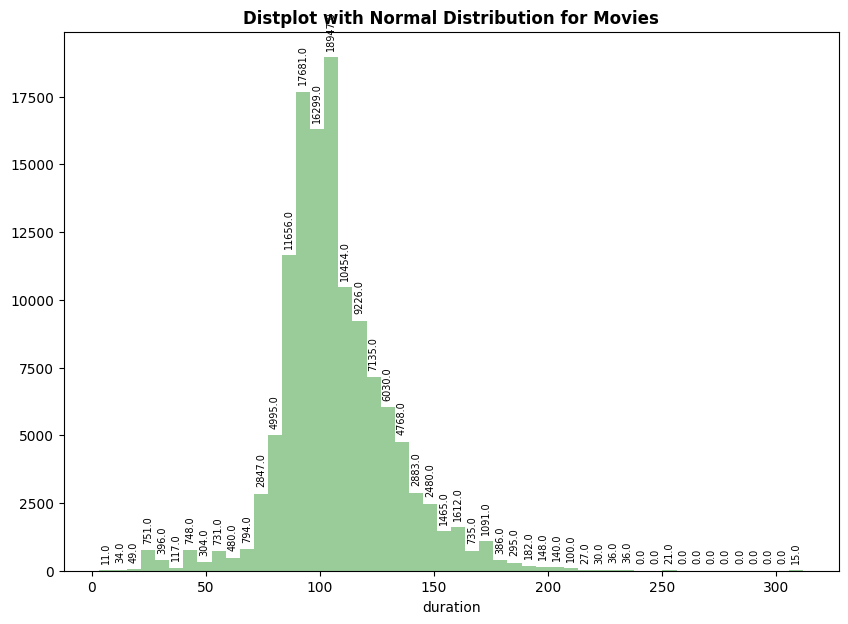

In [ ]:
plt.figure( figsize = (10,7))
plots = sns.distplot( df_movies['duration'], kde = False, color = ['green'])
plt.title('Distplot with Normal Distribution for Movies', fontweight = 'bold')
for bar in plots.patches:
  plots.annotate(bar.get_height(),
                ( bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha = 'center', va = 'bottom', size = 7, xytext = (0,5),
                textcoords = 'offset points', rotation = 90)
plt.show()

1) Insights -

* I found that most of the countries produces content related to adult and teen.
* Among all countries INDIA has less content in Adult segment than teen content.
* 85% of content is Adult content from spain.
* Canada produces more content related to children and family friendly content.

##***5. Hypothesis testing***

Based on my chart experiment, define hypothetical statement from the dataset. In the next question , perform hypothesistesting to obtain final conclusion about the statements through your code and statistical testing.

***Hypothetical Statement :***
* Null Hypothesis: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
* Alternative Hypothesis: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

In [ ]:
# perform statisticql Test to obtain P-values
from statsmodels.stats.proportion import proportions_ztest

# subset the data to only include drama and comdedy movies
subset = df[ df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# calculate the proportion of drama and comedies
drama_prop = len(subset[ subset['Genre'].str.contains('Dramas')]) / len( subset)

comedies_prop = len( subset[ subset['Genre'].str.contains('Comedies')]) / len( subset)

# set ip the parametres for z test
count = [ int( drama_prop * len( subset)) , int( comedies_prop * len(subset))]
nobs = [ len( subset), len(subset)]
alternative = 'two-sided'
# Perform the z test
z_stat, p_value = proportions_ztest( count = count, nobs = nobs, alternative = alternative)
print('z statistic:', z_stat)
print('p values', p_value)

# set the significance level
alpha = 0.05

# print the results of the z test
if p_value < alpha:
  print("Reject the null Hypothesis")
else:
  print("Fail to reject the null hypothesis.")

z statistic: 64.9185037983308
p values 0.0
Reject the null Hypothesis


* I conclude that there is significance ddiffernce in the proportion rartings of drama movies and comedies.

* Why I choosen the specific statistical test?
*  The z test statistic choosen because I amd comapring the proportions of 2 categorical data in a samples. The null hypothesis and akternative hypothesis are about the difference in proportions, and I want to determine if the oberseved differncce inproportions is statistically sitgnificant or not. The z test for proportions is appropriate for this situation because it allows us to compare 2 rpoportions and calculate the probability of the observing the differnce we see in ouir sample if the null hypothesis were true.

##6. Feature engineering and Data pre-processing.
1. Handling Missing Values.

In [ ]:
# check null values
df.isna().sum()

title              0
Actors             0
Director           0
Genre              0
Country            0
type               0
release_year       0
rating             0
duration           0
description        0
1 Season           0
2 Season           0
3 Season           0
day_added       1588
month_added     1588
year_added      1588
dtype: int64

2. Handling Outliers

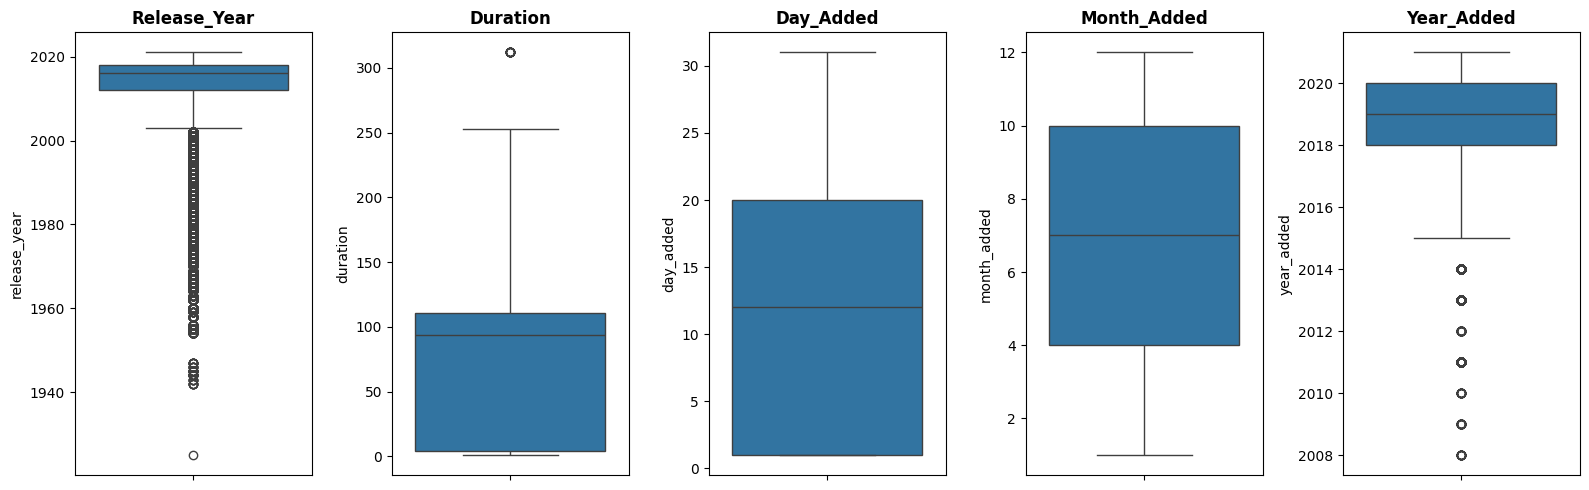

In [ ]:
# storing the continuous value feature in a separate list.
continuous_value_feature = ['release_year','duration','day_added','month_added','year_added']

# checking the outliers with the help of box plot or continous features
plt.figure( figsize = (16,5))

for i, col in enumerate(continuous_value_feature):
  plt.subplot(1,5,i + 1)
  sns.boxplot(df[col])
  plt.title(f'{col.title()}', weight = 'bold')
  plt.tight_layout()

Although I have some of the anomalies in continuous data buy I will not treat by considering outliers as some of the Movies/Tv shows

3. Textual Data Processing

In [ ]:
df_new['rating'].replace( rating_map , inplace = True)

In [ ]:
df_new['rating'].value_counts()

rating
Adult Content              3529
Teen Content               2314
Children Content           1284
Family-friendly Content     555
Not Rated                    88
Name: count, dtype: int64

###1. Textual Columns

In [ ]:
df_new.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_new['content_detail'] = df_new['cast'] + df_new['director'] + df_new['listed_in'] + df_new['type'] + df_new['rating'] + df_new['country'] + df_new['description']

2. Lower Casing

In [ ]:
df_new['content_detail'] = df_new['content_detail'].str.lower()

In [ ]:
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hemaa. l. vijaycomedies, international movies, sci-fi & fantasymovieteen contentindiadue to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

3. Remove Punctuations.

In [ ]:
# functuon to remove punctuation
import string

def remove_punctuations(text):

  return text.translate(translator)

In [ ]:
# removing punctuations rom the content detail
df_new['content_detail'] = df_new['content_detail'].apply( remove_punctuations)

# checking the observations after manipulartion
df_new.iloc[281, ]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hemaa l vijaycomedies international movies scifi  fantasymovieteen contentindiadue to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

4. Removing URL's & removing words and digits contain digits.

In [ ]:
import re

def remove_url_and_numbers(text):
  url_number_pattern = re.compile(r'https?://S+|www.\\S+')
  text = re.sub( url_number_pattern , '', text)

  # replacing the digits with one space
  text = re.sub( '[^a-zA-Z]',' ', text)
  return text

In [ ]:
# remove URL & remove words and digits contain digits
df_new['content_detail'] = df_new['content_detail'].apply(remove_url_and_numbers)

df_new.iloc[281 , ]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hemaa l vijaycomedies international movies scifi  fantasymovieteen contentindiadue to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

5. Removing Stopwords and Removing White spaces

In [ ]:
# downloading stopwors
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords_and_whitespaces( text):
  text = [ word for word in text.split() if not word in stop_words]

  text = ' '.join(text)
  text = re.sub(r'\s+',' ', text)
  return text

In [ ]:
df_new['content_detail'] = df_new['content_detail'].apply( remove_stopwords_and_whitespaces)

6.Tokenization

In [ ]:
nltk.download('punkt')

# tokenization
df_new['content_detail'] = df_new['content_detail'].apply(nltk.word_tokenize)

df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hemaa',
 'l',
 'vijaycomedies',
 'international',
 'movies',
 'scifi',
 'fantasymovieteen',
 'contentindiadue',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

7. Text Normalization

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence( text ):
  text = [wordnet.lemmatize( word ) for word in text]

  return ' '.join( text)

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


df_new['content_detail'] = df_new['content_detail'].apply( lemmatizing_sentence )

df_new.iloc[281, ]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hemaa l vijaycomedies international movie scifi fantasymovieteen contentindiadue family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

Which text normalization technique have I used and Why?

* I used lemmatization produces a more accurate base word: unlike stemming which only removes suffix from a word, lemmatization looks at the meaning of the word and its context to produce a more accurate base form.\

* Lemmatization can handle differnt inflections: lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural lqanguage procesing.

* Lemmatization produces real words: Lemmatization always produces real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

8. Part of Speech

In [ ]:
# tokenize the text into words before POS tagging
df_new['pos_tags'] = df_new['content_detail'].apply( nltk.word_tokenize ).apply(nltk.pos_tag)

df_new.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

9. Text vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer( max_features = 30000 )

In [ ]:
x = tfidfv.fit_transform( df_new['content_detail'])

I hav used TFIDF because in place of BAg OF WORDS because TFIDF takes account importance of each word  in a document. TF IDF assign higher values to rare ords that are unique to a particular document, making them more important in the representation.

##4. Dimesionality Reduction

In contextual data processing, there are 30000 attributes are created in text vectorization and this huge amount of columns cant be dealed with our local machines. So I will using the principal component analysis

In [ ]:
pca_tuned = PCA(n_components = 0.95)

x_transformed = pca_tuned.fit_transform(x.toarray())

x_transformed.shape

variance = pca_tuned.explained_variance_ratio_

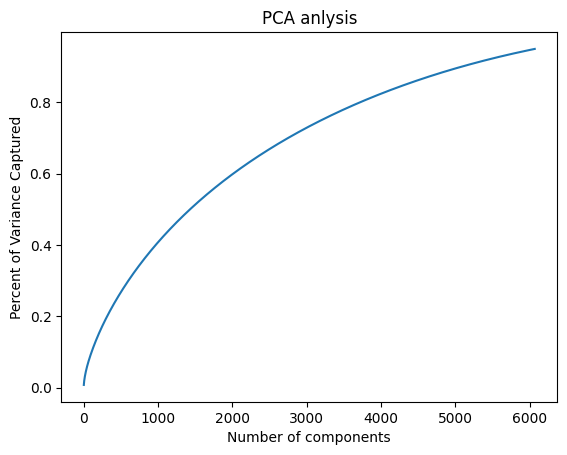

In [ ]:
fig , ax = plt.subplots()
ax.plot( range(1, len(variance) + 1), np.cumsum(pca_tuned.explained_variance_ratio_))
ax.set_xlabel('Number of components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA anlysis')
plt.show()

#7. Ml Model Implementation

##Model 1- K means clustering

K means clustring is a type of unsupervised algorithm used for partitiotning a dataset into numbers of k clusters based on the similarity of the datapoints.
The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re computing the centroid of each cluster based on the new assignments. The algorithm terminates
when the cluster assignments is no longer change or when a maximum number of iterations is reached.

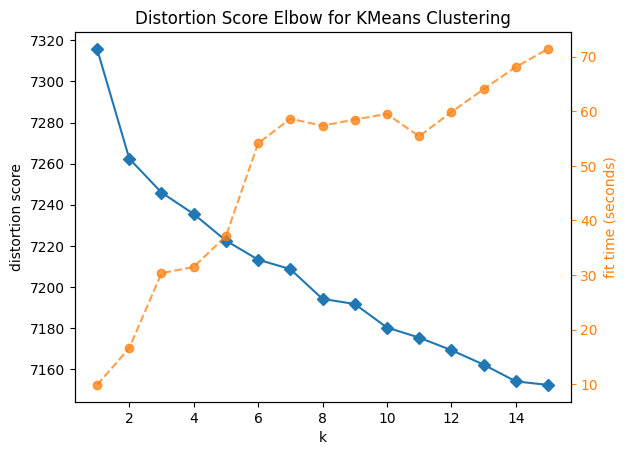

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# lets just iterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with the ELBOW METHOD.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# instantiate the clustering model and visualizer
model = KMeans( random_state = 42)

visualizer = KElbowVisualizer( model , k = (1,16), locate_elbow = False)

# fit the data to the visualizer
visualizer.fit(x_transformed)

visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it Lets plot one or more chart that iterates over the same number of clusters and determines the Silhouette score at the every point.

Okay, but what is Silhouette score?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. Its used to evaluate the quality of clustering, where a higher scores indicates that object are more similar to their own cluster and imilar to other clusters.
The sillhouette scores ranges from -1 to 1 where a score of 1 indicates that the object is poorly matched to its own cluster, and well matched to neighboring cluster.

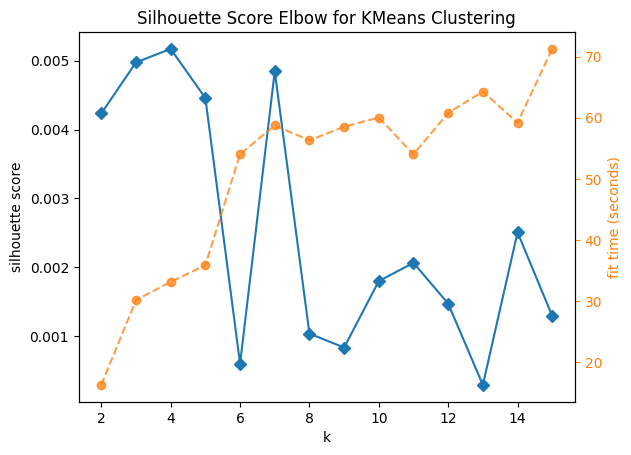

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualiser = KElbowVisualizer( model , k = (2,16), metric = 'silhouette', timings = True, locate_elbow = False)

visualiser.fit(x_transformed)
visualiser.show()

In [ ]:
# computing silhouette scores for each K
# importoing needed libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# defining range
k_range = range(2 , 7)

for k in k_range:
  k_model = KMeans(n_clusters = k)
  labels = k_model.fit_predict(x_transformed)
  score = silhouette_score(x , labels)
  print("k=%d, silhouette score=%f" %  (k, score))

k=2, silhouette score=0.004672
k=3, silhouette score=0.005291
k=4, silhouette score=0.005021
k=5, silhouette score=0.002192
k=6, silhouette score=0.002706


From the above plots ( elbow and silhouette plot) its very clear that the silhouette score is completely good for 4 number of clusters, so I will consider 4 cluster in kmeans analysis.

Now lets plot and see how our data points look like after assigning to their respective clusters.

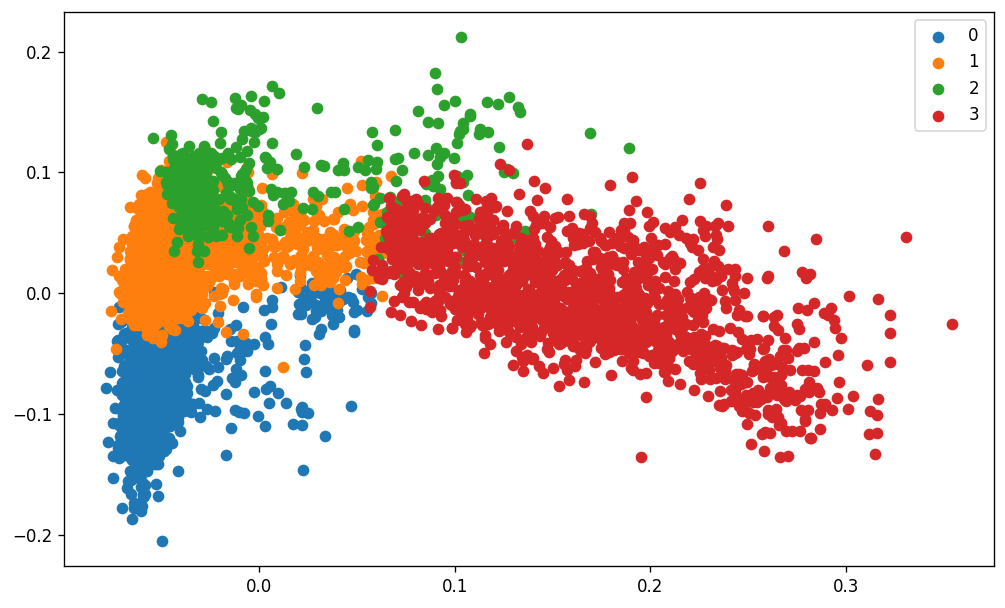

In [ ]:
kmeans = KMeans( n_clusters = 4, init = 'k-means++', random_state = 0)

# predict the labels of clusters.
plt.figure( figsize = (10,6), dpi = 120)
label = kmeans.fit_predict( x_transformed )

unique_labels = np.unique(label)

for i in unique_labels:
  plt.scatter( x_transformed[label == i, 0], x_transformed[label == i, 1], label = i)

plt.legend()
plt.show()

We have 4 different clusters but unfortunately the above plot is in 2 dimensional. so lets plot 3d plot

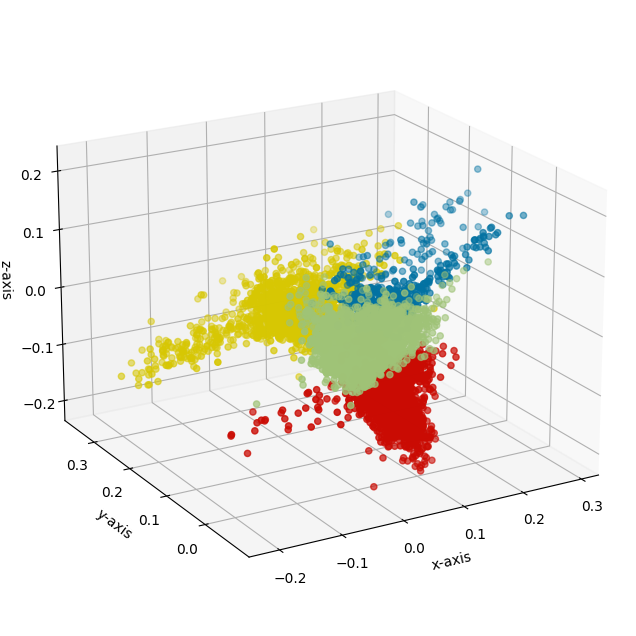

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111 , projection = '3d')
colors = ['r','g','b','y']

for i in range(len( colors)):
  ax.scatter(x_transformed[kmeans.labels_ == i,2], x_transformed[kmeans.labels_ == i,0], x_transformed[kmeans.labels_ == i, 1], c = colors[i])

# rotate the plot 30 degrees around the x axis and 45 degrees around the z axis
ax.view_init( elev = 20, azim = -120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differntite the 4 clusters wit naked eye. Now lets design the content in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
df_new['kmeans_cluster'] = kmeans.labels_

1. Explain the ML model used and its performance?

In [ ]:
def kmeans_wordcloud( cluster_number , column_name ):
  '''function for building a wordcloud for the movies and tv shows'''
  from wordcloud import WordCloud, STOPWORDS

  df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[ df_wordcloud['kmeans_cluster'] == cluster_number]
  df_wordcloud = df_wordcloud[ df_wordcloud[column_name].str.len()>0]

  # combine all text documents into a single string
  text = ' '.join( word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud( stopwords = set( STOPWORDS), background_color = 'black').generate(text)

  # convert the wordcloud to a numpy array
  image_array = wordcloud.to_array()

  # return the numpy array
  return image_array


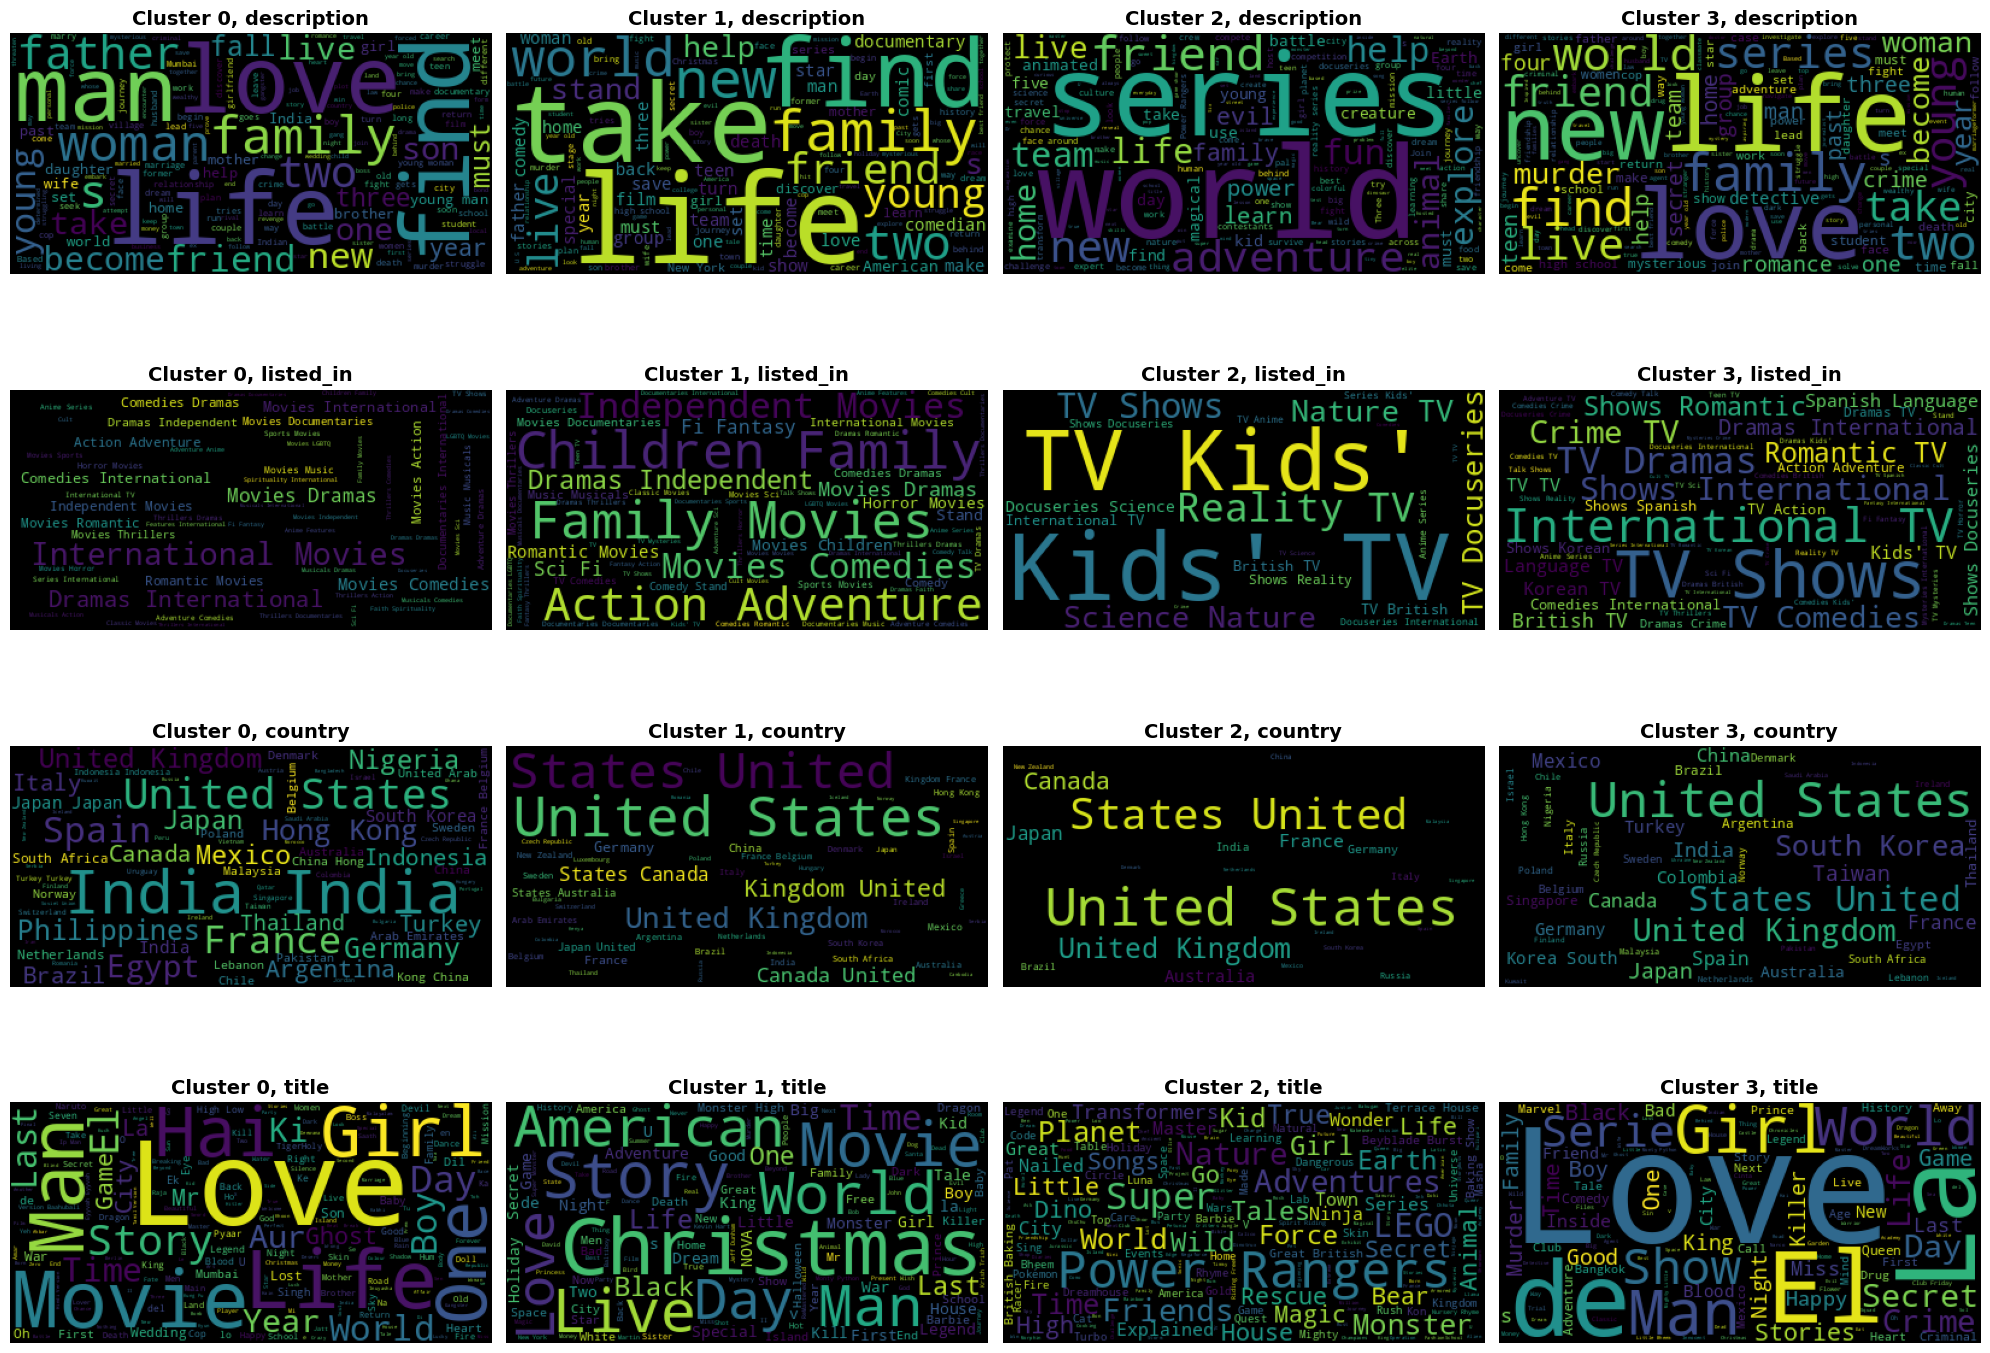

In [ ]:
# implemnting the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots( nrows = 4, ncols = 4, figsize = (20,15))

for i in range(4):
  for j , col in enumerate(['description','listed_in','country','title']):
    axs[j][i].imshow(kmeans_wordcloud(i , col))
    axs[j][i].axis('off')
    axs[j][i].set_title(f'Cluster {i}, {col}', fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show()

Ml Model - 2 (Hierarchical Clustering)

Hierarchical clustering is a type of clustering algoru=ithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a dendogram and then we will determine the ooptimal number of clusters.

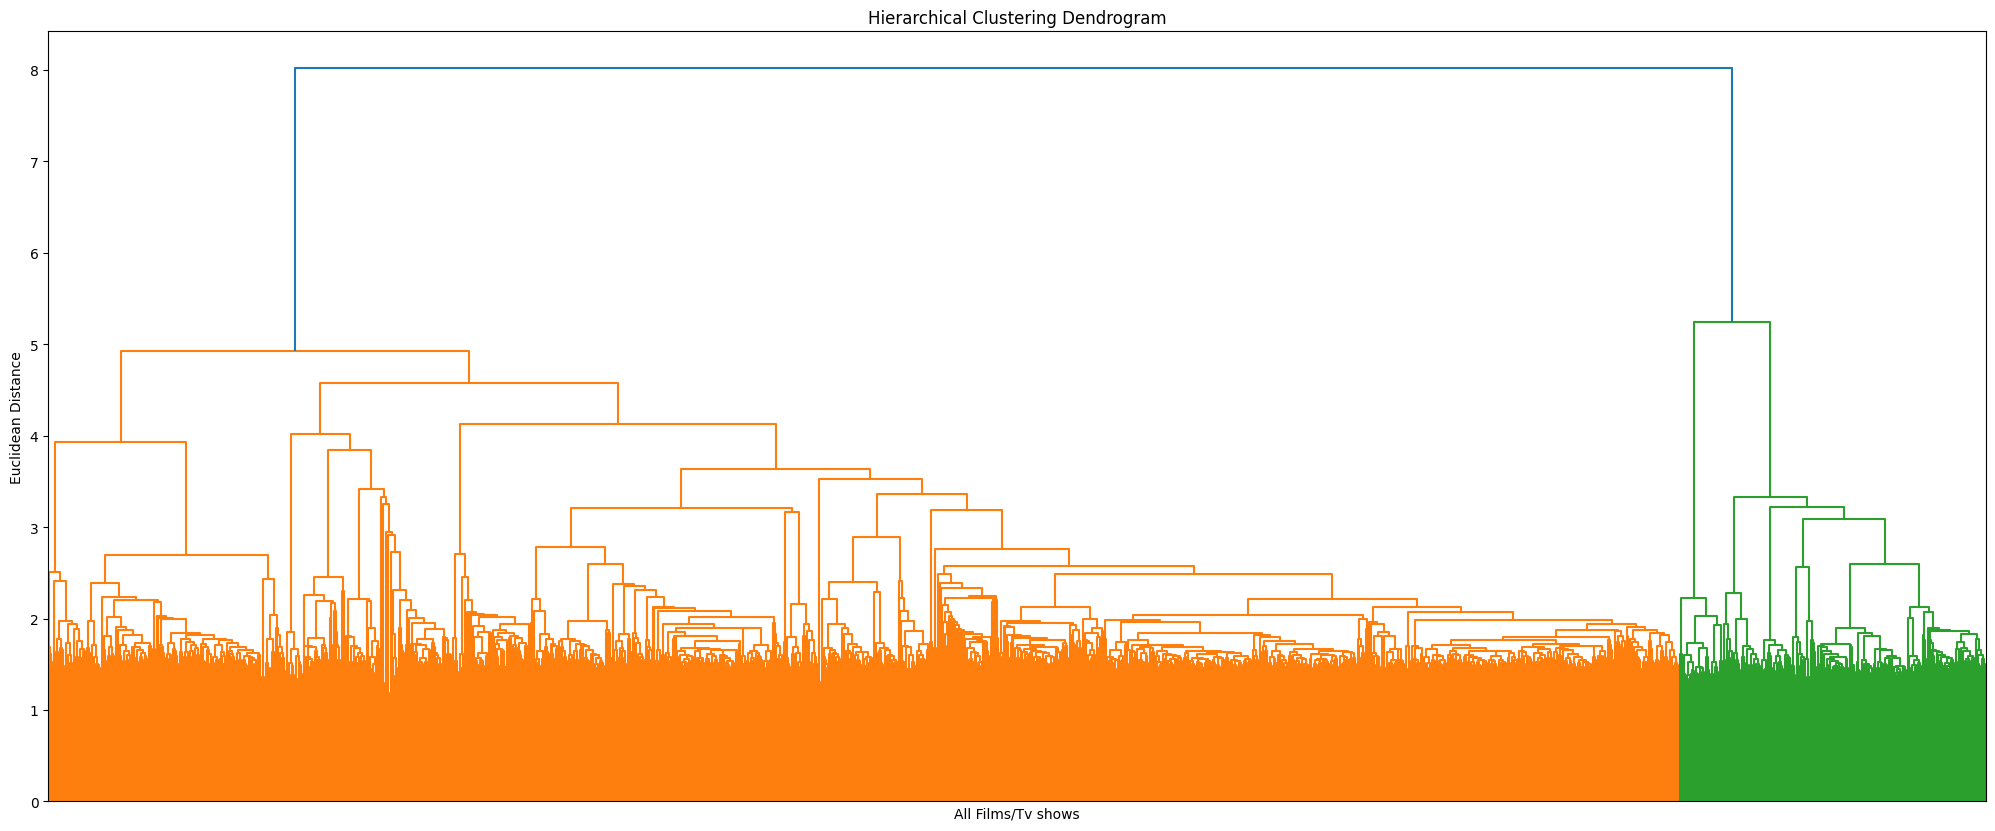

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Hierarchical clustering
distance_linkage = linkage( x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All Films/Tv shows')
plt.ylabel('Euclidean Distance')

dendrogram( distance_linkage, no_labels = True)
plt.show()

Cool, but whats dendogram and how to determine the **optimal value of clusters?**
* A dendrogram is a tree like diagram that records the sequences of merges or split. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
 From the above Dendrogram we can say that optimal value of clusters is 2. But before assigning the values to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the data points.

In [ ]:
# Cpomputing silhouette scores for eacvh k
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# range selected from dendrogram above
k_range = range(2,10)

for k in k_range:
  model = AgglomerativeClustering(n_clusters = k)
  labels = model.fit_predict(x_transformed)
  score = silhouette_score(x, labels)
  print("k=%d, Silhouette score = %f" % (k,score))


k=2, Silhouette score = 0.001876
k=3, Silhouette score = -0.000453
k=4, Silhouette score = -0.000141
k=5, Silhouette score = 0.000271
k=6, Silhouette score = 0.000550
k=7, Silhouette score = 0.000315
k=8, Silhouette score = 0.000521
k=9, Silhouette score = 0.000849


From the abvove silhouette scores its clear that the 2 clusters are optimal value, hich also clear from the Dendrogram that for 2 clusters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

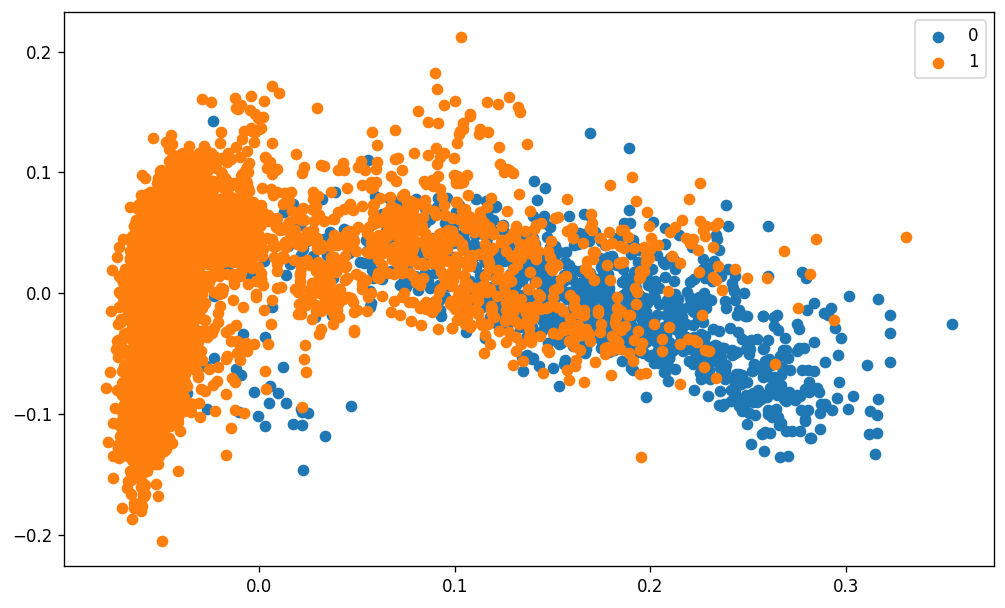

In [ ]:
# trainuintg the k means model on a dataset
Agmodel = AgglomerativeClustering( n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

# predict the labels of clusters.
plt.figure(figsize = (10,6), dpi = 120)
label = Agmodel.fit_predict(x_transformed)

# getting unique labels
unique_labels = np.unique(label)

# plotting the results:
for i in unique_labels:
  plt.scatter(x_transformed[ label == i, 0], x_transformed[ label == i, 1], label = i)
plt.legend()
plt.show()

Again plotting the three dimensional plot to see the clusters clearly.

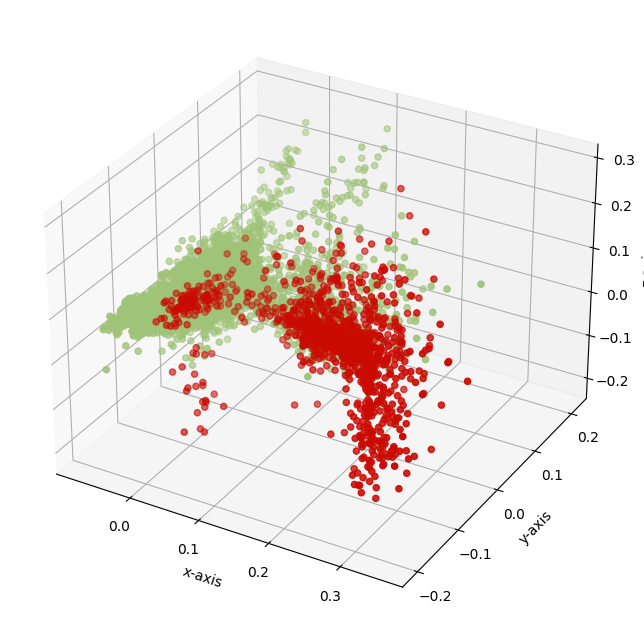

In [ ]:
# importing the library to visualize the clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# plot the clusters in 3D
fig = plt.figure( figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
colors = ['r','g','b','y']

for i in range(len(colors)):
  ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[ Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2], c = colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool we can again easily differentiate the all 2 clusters with naked eye. Now lets assign the content in their respective clusters.

In [ ]:
df_new['agglomerative_cluster'] = Agmodel.labels_

1. Explain the ML model used and its performance using Evaluation metric score chart.

Lets again define a function that plots wordcloud for differnt attributes using agglomerative clustering.

In [ ]:
def aggloemartive_wordcloud(cluster_number , column_name):
  from wordcloud import WordCloud, STOPWORDS

  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # combine all text documents into a ingle string
  text = ' '.join( word for word in df_wordcloud[column_name])

  # create the word ccloud
  wordcloud = WordCloud( stopwords = set(STOPWORDS), background_color = 'black').generate(text)

  return wordcloud

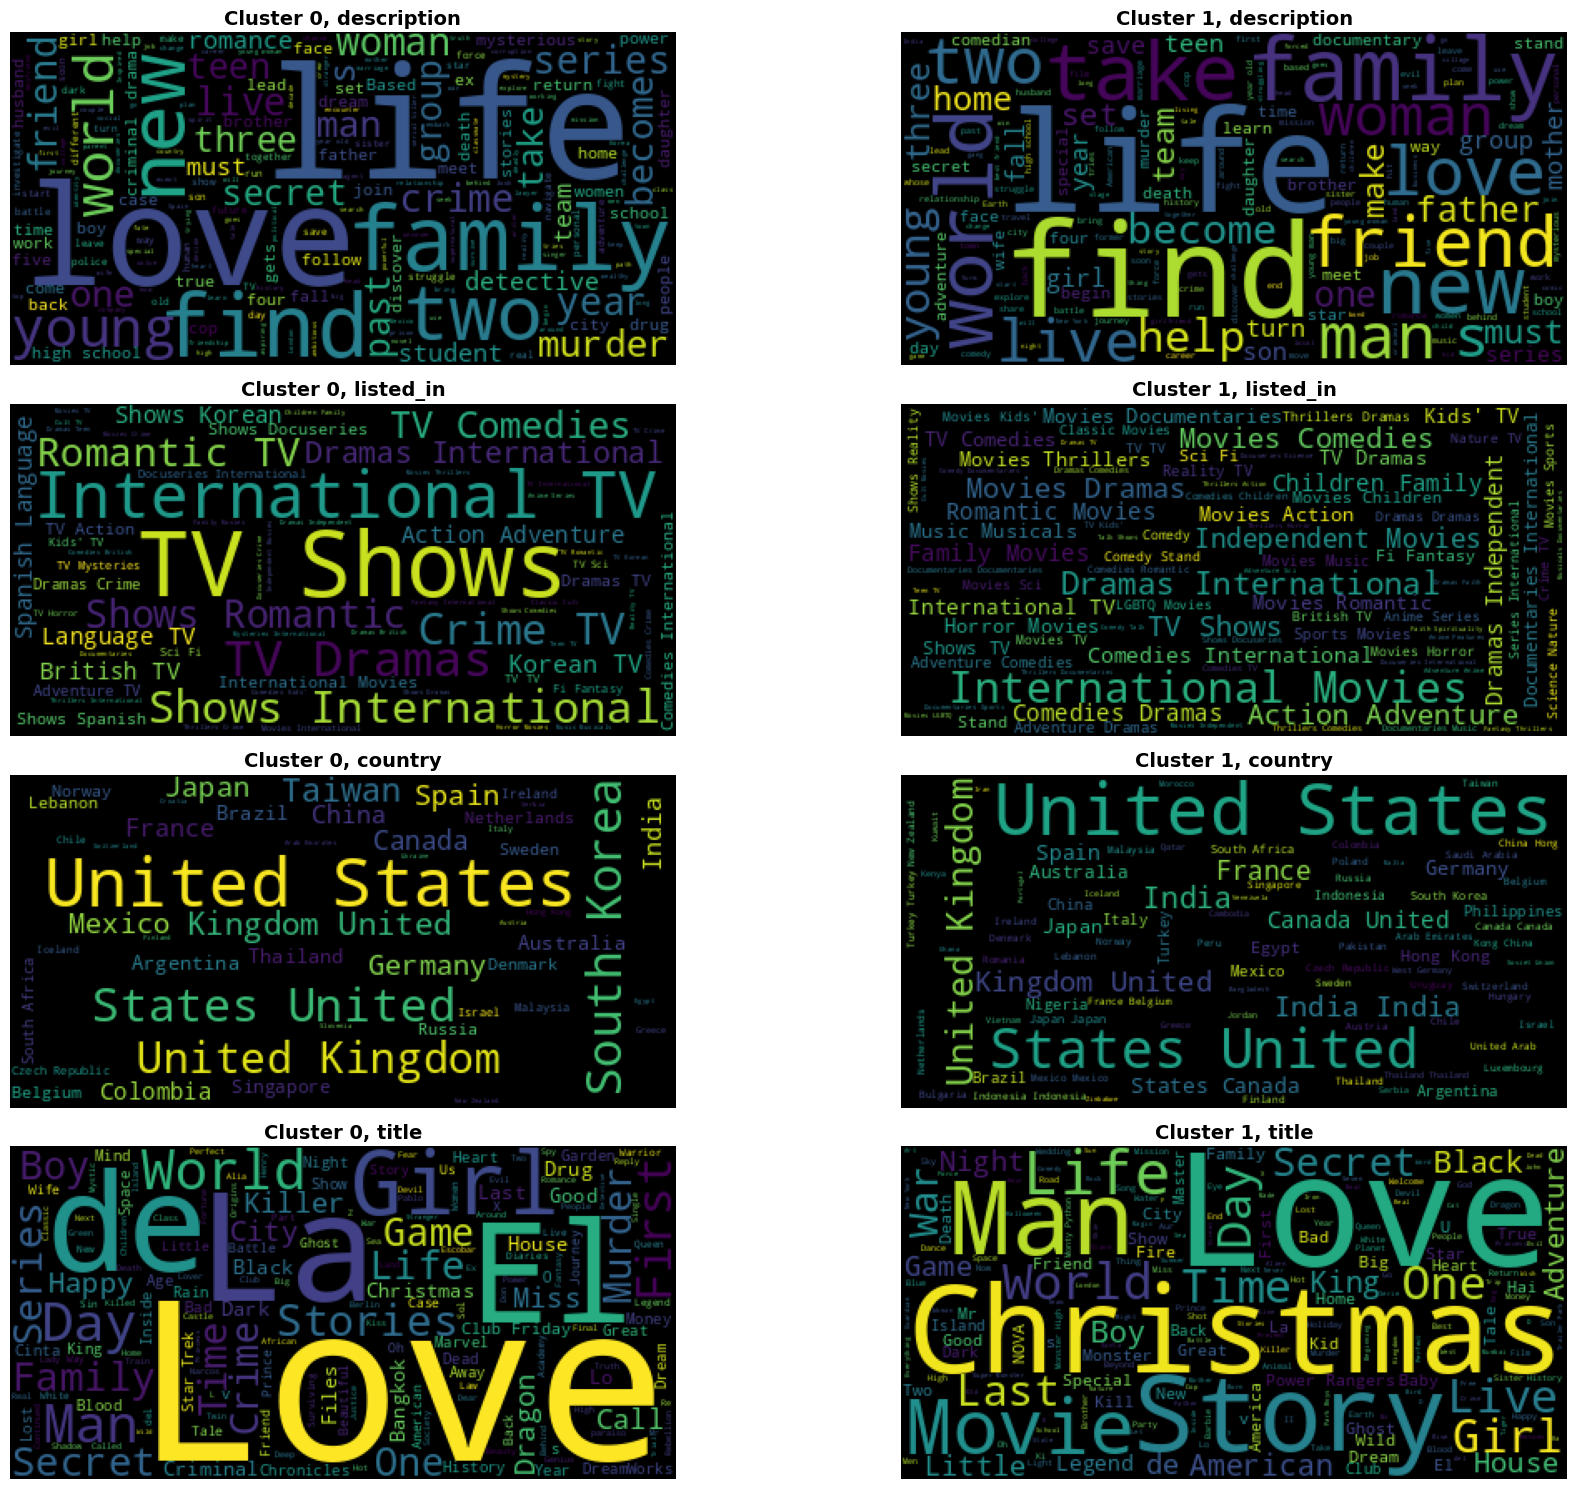

In [ ]:
# implementting the above defined function and plotting the wwordcloud of each attribute
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (20,15))

for i in range(2):
  for j, col in enumerate(['description','listed_in','country','title']):
    axs[j][i].imshow( aggloemartive_wordcloud(i, col))
    axs[j][i].axis('off')
    axs[j][i].set_title(f'Cluster {i}, {col}', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

ML Model - 3 ( Building a recommendation system)

I am using Cosine similairty as its a measure of similarity between 2 non zeroes vectors in a dimensional space. It measures the cosine of the angle between the 2 vectors, which range from -1 to 1 with 0 indiacting orthogonality( the vecrors are perpendicluar to each other).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# create a Tf IDF vectorizer object and transformation the text data
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

#compute the cosine similarity matrix

cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title , cosine_sim = cosine_sim, data = df_new):
  # get the index of the input
  programme_list = data['title'].to_list()
  index = programme_list.index(title)

  # create a list of tuples containing the similarity cores and index
  # between the input title and all other programmes in the dataset
  sim_scores = list( enumerate(cosine_sim[index]))

  # sort the list of tuples by similarity score and index
  # betweeen the input title and all other programmes in the dataset
  sim_scores = list(enumerate(cosine_sim[index]))

  sim_scores = sorted( sim_scores, key = lambda x: x[1], reverse =True)[1:11]

  # get the recommended movie titles and their similarity scores
  recommend_index = [i[0] for i in sim_scores]
  rec_movie = data['title'].iloc[recommend_index]
  rec_score = [round(i[1], 4) for i in sim_scores]

  # create a pandas dataframe to display the recommenddations
  rec_table = pd.DataFrame(list( zip( rec_movie, rec_score)), columns = ['recommendation','similarity_scores(0-1)'])

  return rec_table

Lets check how my recommender system is performing.

In [ ]:
recommend_content('Star Trek')

recommendation  similarity_scores(0-1)
0               For the Love of Spock                  0.2625
1      Star Trek: The Next Generation                  0.2334
2               Star Trek: Enterprise                  0.1612
3          Star Trek: Deep Space Nine                  0.1248
4                       Stargate SG-1                  0.1091
5                The Umbrella Academy                  0.1056
6             The Shannara Chronicles                  0.0980
7                    Forbidden Planet                  0.0905
8           Wizards: Tales of Arcadia                  0.0900
9  Inside the Mind of a Serial Killer                  0.0886

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* **Silhouette score is less sensitive to the shape of the clusters**, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

# **Conclusion**

### **Conclusions drawn from EDA**

**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:**

* Movies make up about **two-thirds **of Netflix content, with TV shows comprising the remaining **one-third**.

* Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.

* Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.

* **Jan Suter** is the most common movie director, and **Ken Burns** is the most common TV show director on Netflix.

* The **United States** is the largest producer of movies and TV shows on Netflix, followed by **India**. **Japan** and **South Korea** have more TV shows than movies, indicating growth potential in that area.

* **International movies, drama, and comedy** are the most popular genres on Netflix.

* TV show additions on Netflix have increased since **2018**, while movie additions have decreased. In **2020**, fewer movies were added compared to **2019**, but more TV shows were added.

* **October, November, and December** are popular months for adding TV shows, while **January, October, and November** are popular for adding movies. February sees the least additions.

* **Movies and TV shows** are typically added at the beginning or middle of the month and are popularly added on weekends.

* Most movies on Netflix have durations between **80 to 120 minutes**, while TV shows commonly have **one or two seasons**.

* Various countries contribute **adult and teen content**, with Spain producing the most **adult content** and Canada focusing on **children and family-friendly** categories.

### **Conclusions drawn from ML Model**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**, whereas for **Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.

##  ***Future Work (Optional)***

- Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering  can lead to numerous intriguing discoveries.

- By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***